# **Analisis Segmentasi Pelanggan dengan Memanfaatkan Associative Models dan Implementasi Website untuk Meningkatkan Penjualan pada Air Minum G-24**

#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari proyek ini adalah untuk memahami perilaku belanja konsumen pada penjualan depo Air Minum G-24. Ini melibatkan pengenalan kebutuhan konsumen, identifikasi pola pembelian, dan sistem pemesanan yang umum dilakukan oleh mereka. Dengan memahami preferensi dan kebiasaan konsumen secara mendalam, bisnis dapat menyesuaikan strategi mereka untuk meningkatkan pengalaman berbelanja. Dataset ini diharapkan dapat memberikan wawasan yang diperlukan bagi bisnis galon (G-24) untuk mengambil keputusan yang lebih baik dalam meningkatkan pertumbuhan mereka.

##**Assess Situation**

Dengan munculnya banyak pesaing baru di sekitar wilayah tersebut, terjadi penurunan penjualan yang signifikan bagi depo Air Minum G-24. Pemahaman mendalam terhadap perilaku konsumen sangat penting bagi pemilik untuk tetap berkembang dan mengatasi tantangan ini serta menyesuaikan strategi pemasaran atau pengambilan keputusan bisnis yang efektif untuk meningkatkan daya saing di pasar yang semakin kompetitif.

##**Data Mining Goals**

Tujuan analisis data ini adalah untuk mendapatkan pemahaman menyeluruh tentang perilaku belanja konsumen di depo Air Minum G-24. Fokus utamanya adalah untuk mengidentifikasi pola perilaku konsumen dan faktor-faktor yang memengaruhi tingkat penjualan bisnis. Dengan demikian, hasil dari analisis ini diharapkan dapat mendukung pengembangan strategi bisnis yang lebih cerdas dan berorientasi pada pola konsumen, membantu dalam pengambilan keputusan yang lebih baik dalam menghadapi persaingan yang ketat, menciptakan pengalaman berbelanja yang baik, dan memastikan pertumbuhan bisnis yang berkelanjutan.


##**Project Plan**

Rencana proyek ini akan dimulai dengan pengumpulan data konsumen dari sumber yang tersedia mengenai penjualan air minum G-24. Setelah itu, dataset akan disiapkan dengan melakukan pembersihan data dan preprocessing untuk memastikan keakuratan dan konsistensi dataset yang akan digunakan dalam analisis. Langkah selanjutnya adalah melakukan eksplorasi data untuk memahami pola perilaku konsumen dan mengidentifikasi segmen-segmen pelanggan yang berbeda menggunakan Assosiative Models (Model Clustering). Dalam tahap ini, analisis data mining akan dilakukan untuk mengidentifikasi faktor-faktor yang memengaruhi perilaku pembelian pelanggan dan mengetahui pola pembelian yang umum dilakukan. Hasil dari analisis data mining akan digunakan untuk mengembangkan strategi pemasaran yang lebih efektif dan berorientasi pada preferensi pelanggan. Evaluasi model dan penyesuaian akan dilakukan untuk memastikan keakuratan dan relevansi dari hasil analisis sebelum akhirnya hasil analisis disajikan dalam format yang jelas dan dapat dimengerti untuk mendukung pengambilan keputusan yang lebih baik dalam meningkatkan penjualan air minum G-24 serta menciptakan pengalaman berbelanja yang lebih baik bagi pelanggan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

In [ ]:
# Menampilkan dataraw/dataset
df = pd.read_csv("https://raw.githubusercontent.com/PA-ENTERPRISE-KELOMPOK-NBSV/Data-Mining/main/Dataset%20Penjualan%20Air%20Minum%20G-24%202023.csv")
df

,No,Tanggal Beli,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan
0,1,26/01/2023,72,58,130,298,428,228,200,Rp2.399.000,Rp1.090.000,Rp1.309.000
1,2,27/01/2023,30,18,48,331,379,250,129,Rp2.976.000,Rp80.000,Rp2.896.000
2,3,28/01/2023,20,19,39,220,259,139,120,Rp1.525.000,Rp451.000,Rp1.074.000
3,4,29/01/2023,21,20,41,278,319,170,149,Rp2.098.000,Rp450.000,Rp1.648.000
4,5,30/01/2023,28,32,60,160,220,125,95,Rp1.357.000,Rp69.000,Rp1.288.000
...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,21/07/2023,30,36,66,287,353,176,177,Rp2.220.000,Rp1.347.000,Rp873.000
177,178,22/07/2023,24,33,57,294,351,175,176,Rp2.122.000,Rp251.000,Rp1.871.000
178,179,23/07/2023,33,30,63,239,302,151,151,Rp2.229.000,Rp173.500,Rp2.055.500
179,180,24/07/2023,27,48,75,214,289,144,145,Rp1.963.000,Rp390.000,Rp1.573.000


In [ ]:
# Menampilkan 5 baris pertama
df.head()

,No,Tanggal Beli,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan
0,1,26/01/2023,72,58,130,298,428,228,200,Rp2.399.000,Rp1.090.000,Rp1.309.000
1,2,27/01/2023,30,18,48,331,379,250,129,Rp2.976.000,Rp80.000,Rp2.896.000
2,3,28/01/2023,20,19,39,220,259,139,120,Rp1.525.000,Rp451.000,Rp1.074.000
3,4,29/01/2023,21,20,41,278,319,170,149,Rp2.098.000,Rp450.000,Rp1.648.000
4,5,30/01/2023,28,32,60,160,220,125,95,Rp1.357.000,Rp69.000,Rp1.288.000


In [ ]:
# Menampilkan 5 baris terakhir
df.tail()

,No,Tanggal Beli,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan
176,177,21/07/2023,30,36,66,287,353,176,177,Rp2.220.000,Rp1.347.000,Rp873.000
177,178,22/07/2023,24,33,57,294,351,175,176,Rp2.122.000,Rp251.000,Rp1.871.000
178,179,23/07/2023,33,30,63,239,302,151,151,Rp2.229.000,Rp173.500,Rp2.055.500
179,180,24/07/2023,27,48,75,214,289,144,145,Rp1.963.000,Rp390.000,Rp1.573.000
180,181,25/07/2023,45,40,85,358,443,221,222,Rp2.468.000,Rp210.000,Rp2.258.000


##**Describe Data**

####Informasi Dasar

In [ ]:
# Mengecek Total Kolom dan Total Baris
total_baris, total_kolom = df.shape

print(f"Kolom : {total_kolom} Kolom")
print(f"Baris : {total_baris} Baris")

Kolom : 12 Kolom
Baris : 181 Baris


In [ ]:
# Menampilkan Nama Kolom
df.columns

Index(['No', 'Tanggal Beli', 'Beli Langsung Siang', 'Beli Langsung Malam',
       'Total Beli Langsung', 'Total Beli Antar', 'Total Keseluruhan',
       'Merek AQUA', 'Merek DC', 'Total Penjualan', 'Total Pengeluaran',
       'Hasil Pendapatan'],
      dtype='object')

Pada data diatas yang telah ditampilkan memiliki jumlah baris dan kolom yakni sebanyak **182 baris dan 12 kolom**, dimana untuk kolom-kolom tersebut terdiri dari kolom No, Tanggal Beli, Beli Langsung Siang, Beli Langsung Malam, Total Beli Langsung dan lain sebagainya seperti yang sudah tertampilkan pada informasi dasar diatas.

####Informasi Lanjutan

In [ ]:
# Untuk menampilkan informasi dari dataraw/dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No                   181 non-null    int64 
 1   Tanggal Beli         181 non-null    object
 2   Beli Langsung Siang  181 non-null    int64 
 3   Beli Langsung Malam  181 non-null    int64 
 4   Total Beli Langsung  181 non-null    int64 
 5   Total Beli Antar     181 non-null    int64 
 6   Total Keseluruhan    181 non-null    int64 
 7   Merek AQUA           181 non-null    int64 
 8   Merek DC             181 non-null    int64 
 9   Total Penjualan      181 non-null    object
 10  Total Pengeluaran    181 non-null    object
 11  Hasil Pendapatan     181 non-null    object
dtypes: int64(8), object(4)
memory usage: 17.1+ KB


Pernyataan **"Non-Null Count : 182 non-null"** menunjukkan bahwa dari total entri/data dalam kolom tersebut, ada 182 data yang memiliki nilai non-null, atau dengan kata lain, tidak ada nilai null (atau missing value) dalam kolom tersebut.

**Tipe Data :**

* Integer64 (int64): Ini adalah tipe data untuk bilangan bulat.

* Object: Tipe data object dalam Pandas biasanya digunakan untuk menyimpan teks atau kombinasi teks dan angka.



**Keterangan :**

1. **No** :yakni kolom nomor memiliki tipe data int64 (integer)
2. **Tanggal Beli** : yakni Tanggal Galon tersebut terjual dalam hari memiliki tipe data object
3. **Beli Langsung Siang** : yakni Jumlah Galon yang terjual secara langsung pada Siang Hari dan memiliki tipe data int64 (integer)
4. **Beli Langsung Malam** : yakni Jumlah Galon yang terjual secara langsung pada Malam Hari dan memiliki tipe data int64 (integer)
5. **Total Beli Langsung** : yakni Total Keseluruhan dari Galon yang terjual secara Langsung untuk Siang Hari dan Malam Hari serta memiliki tipe data int64 (integer)
6. **Total Beli Antar** : yakni Jumlah Galon yang terjual secara diantar dan memiliki tipe data int64 (integer)
7. **Total Keseluruhan** : yakni Total Keseluruhan antara Total Beli Langsung (Siang & Malam) dan Total Beli Antar memiliki tipe data int64 (integer)
8. **Merek AQUA** : yakni Total Galon Merek AQUA yang terjual ke Pelanggan Selama 1 Hari dan memiliki tipe data int64 (integer)
9. **Merek DC** : yakni Total Galon Merek DC yang terjual ke Pelanggan Selama 1 Hari dan memiliki tipe data int64 (integer)
11. **Total Penjualan** : yakni Total Penjualan dalam Rupiah untuk Total Beli Langsung (Siang & Malam), Total Beli Antar dan Semua Merek (AQUA & DC) (memiliki tipe data Object)
12. **Total Pengeluaran** : yakni Total Pengeluaran dalam Rupiah untuk pengeluaran selama per hari (memiliki tipe data Object)
13. **Hasil Pendapatan** : yakni Hasil Pendapatan Keseluruhan dalam Rupiah dari Total Penjualan - Total Pengeluaran (memiliki tipe data Object)

####Informasi Statistik Deskriptif

In [ ]:
# Menampilkan hasil statistik deskriptif untuk kolom numerik dalam data frame
df.describe()

,No,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,34.232044,27.906077,62.138122,262.220994,324.359116,164.806630,160.580110
std,52.394338,9.773051,9.052748,14.157752,55.699749,58.383771,38.935576,35.808913
min,1.000000,17.000000,9.000000,35.000000,122.000000,165.000000,80.000000,82.000000
25%,46.000000,29.000000,22.000000,54.000000,220.000000,282.000000,139.000000,137.000000
50%,91.000000,32.000000,28.000000,60.000000,266.000000,323.000000,162.000000,158.000000
75%,136.000000,40.000000,33.000000,68.000000,301.000000,369.000000,187.000000,183.000000
max,181.000000,72.000000,58.000000,130.000000,396.000000,461.000000,263.000000,250.000000


Ini memberikan ringkasan statistik deskriptif untuk kolom numerik dalam DataFrame. Mencakup count(total data), mean, std (standar deviasi), min, quartil (25%, 50%, 75%), dan max untuk masing-masing kolom.

Seperti contoh Kolom
**Beli Langsung Siang** :
1. Count Jumlah Baris pada Dataset
2. Rata-rata Beli Langsung Siang dalam data adalah 34.274725
3. Standar deviasi yakni 9.763011
4. Rentang Beli Langsung Siang (Min & Max) sekitar 17.000000 hingga 72.000000
5. Q1 (kuartil ke-1 atau 25%) dari Beli Langsung Siang yakni 29.000000
6. Q2/median (kuartil ke-2 atau 50%) yakni skitar 32.000000
7. Q3 (kuartil ke-3 atau 75%) adalah 40.000000

Dari hal ini bisa dilihat bahwa mayoritas pelanggan yang melakukan Beli Langsung pada Siang Hari yakni 29.000000 hingga 40.000000

In [ ]:
# Menampilkan hasil statistik deskriptif baik itu numerik maupun non-numerik dalam data frame.
df.describe(include="all")

,No,Tanggal Beli,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan
count,181.000000,181,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181,181,181
unique,NaN,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,127,142
top,NaN,26/01/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rp2.201.000,Rp80.000,Rp1.288.000
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8,5
mean,91.000000,NaN,34.232044,27.906077,62.138122,262.220994,324.359116,164.806630,160.580110,NaN,NaN,NaN
std,52.394338,NaN,9.773051,9.052748,14.157752,55.699749,58.383771,38.935576,35.808913,NaN,NaN,NaN
min,1.000000,NaN,17.000000,9.000000,35.000000,122.000000,165.000000,80.000000,82.000000,NaN,NaN,NaN
25%,46.000000,NaN,29.000000,22.000000,54.000000,220.000000,282.000000,139.000000,137.000000,NaN,NaN,NaN
50%,91.000000,NaN,32.000000,28.000000,60.000000,266.000000,323.000000,162.000000,158.000000,NaN,NaN,NaN
75%,136.000000,NaN,40.000000,33.000000,68.000000,301.000000,369.000000,187.000000,183.000000,NaN,NaN,NaN


Ini memberikan ringkasan statistik deskriptif untuk semua kolom dalam DataFrame, baik itu numerik maupun non-numerik. Untuk kolom numerik, informasinya sama seperti df.describe(). Namun, untuk kolom **non-numerik** (seperti objek), itu akan menyertakan jumlah unik, nilai yang paling sering muncul (top), dan frekuensi nilai teratas (freq).

In [ ]:
# Menampilkan Korelasi
df.corr(numeric_only=True)

,No,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC
No,1.000000,0.219237,-0.110265,0.080833,-0.178084,-0.150295,-0.162750,-0.091942
Beli Langsung Siang,0.219237,1.000000,0.129854,0.773328,0.047352,0.232703,0.170777,0.178045
Beli Langsung Malam,-0.110265,0.129854,1.000000,0.729058,0.053753,0.228075,0.252780,0.099808
Total Beli Langsung,0.080833,0.773328,0.729058,1.000000,0.067057,0.306469,0.279520,0.186723
Total Beli Antar,-0.178084,0.047352,0.053753,0.067057,1.000000,0.970289,0.751988,0.779513
Total Keseluruhan,-0.150295,0.232703,0.228075,0.306469,0.970289,1.000000,0.785199,0.788957
Merek AQUA,-0.162750,0.170777,0.252780,0.279520,0.751988,0.785199,1.000000,0.267271
Merek DC,-0.091942,0.178045,0.099808,0.186723,0.779513,0.788957,0.267271,1.000000




**Keterangan :**
* Korelasi Rendah: Jika koefisien korelasi mendekati nol (0), maka hubungan antara dua variabel dianggap rendah. Ini menunjukkan bahwa tidak ada hubungan linier yang kuat antara kedua variabel tersebut.
* Korelasi Lemah: Jika koefisien korelasi berkisar antara 0 hingga ±0,3, maka hubungan antara dua variabel dianggap lemah. Meskipun ada hubungan, hubungan tersebut tidak signifikan secara substansial.
* Korelasi Kuat: Jika koefisien korelasi mendekati ±1, maka hubungan antara dua variabel dianggap kuat. Nilai korelasi yang mendekati +1 menunjukkan hubungan positif yang kuat, sedangkan nilai korelasi yang mendekati -1 menunjukkan hubungan negatif yang kuat. Semakin mendekati nilai tersebut, semakin kuat hubungan antara kedua variabel tersebut.

seperti contoh yakni untuk kolom beli langsung dibawah ini yang mempunyai hubungan dengan kolom kolom lain

**Beli Langsung Siang**
* Beli Langsung Siang dan Beli Langsung Malam : Korelasi ini menunjukkan hubungan positif yang lemah (0.129854) antara jumlah pembelian langsung siang dan malam. Meskipun hubungan positif, korelasi ini tidak terlalu kuat.
* Beli Langsung Siang dan Total Beli Langsung : Korelasi ini menunjukkan hubungan yang kuat (0.773328) antara jumlah pembelian langsung siang dan total pembelian langsung. Hal ini menunjukkan bahwa pembelian langsung siang secara signifikan berkontribusi terhadap total pembelian langsung.
* Beli Langsung Siang dan Total Beli Antar : Korelasi ini menunjukkan hubungan positif yang rendah (0.047352) antara jumlah pembelian langsung siang dan total pembelian antar. Meskipun ada hubungan positif, korelasi ini tidak signifikan.
* Beli Langsung Siang dan Total Keseluruhan : Korelasi ini menunjukkan hubungan yang cukup kuat (0.232703) antara jumlah pembelian langsung siang dan total pembelian keseluruhan. Meskipun tidak sekuat dengan total pembelian langsung, hubungan ini tetap cukup signifikan.
* Beli Langsung Siang dan Merek AQUA : Korelasi ini menunjukkan hubungan positif yang lemah (0.170777) antara jumlah pembelian langsung siang dan merek AQUA. Meskipun hubungan positif, korelasi ini tidak terlalu kuat.
* Beli Langsung Siang dan Merek DC: Korelasi ini menunjukkan hubungan positif yang lemah (0.178045) antara jumlah pembelian langsung siang dan merek DC. Meskipun hubungan positif, korelasi ini tidak terlalu kuat.


##**Exploratory Data Analysis**

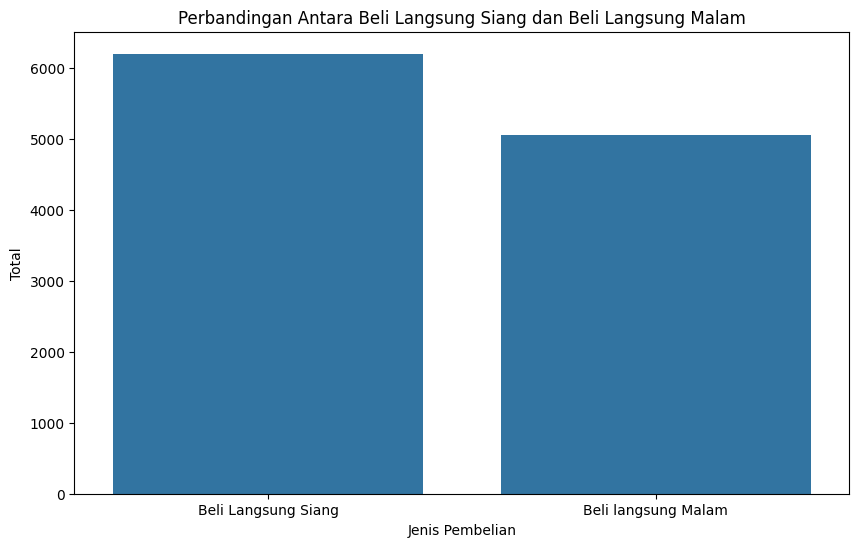

In [ ]:
# Bar Plot untuk Perbandingan Antara Total Beli Langsung dan Total Beli Antar
plt.figure(figsize=(10, 6))
sns.barplot(x=['Beli Langsung Siang', 'Beli langsung Malam'], y=[df['Beli Langsung Siang'].sum(), df['Beli Langsung Malam'].sum()])
plt.title('Perbandingan Antara Beli Langsung Siang dan Beli Langsung Malam')
plt.xlabel('Jenis Pembelian')
plt.ylabel('Total')
plt.show()

**Keterangan :**
Pada grafik diatas terlihat sebuah perbandingan Antara Beli langsung Siang dan Beli langsung malam terlihat pada beli langsung siang terlihat lebih besar dengan sebanyak kurang lebih 6000 galon keatas, ketimbang beli langsung malam hanya terjual dengan sebanyak 5000 galon. Artinya dalam pola pelanggan melakukan pembelian secara langsung atau ditempat lebih kebanyakan di siang hari ketimbang malam hari.

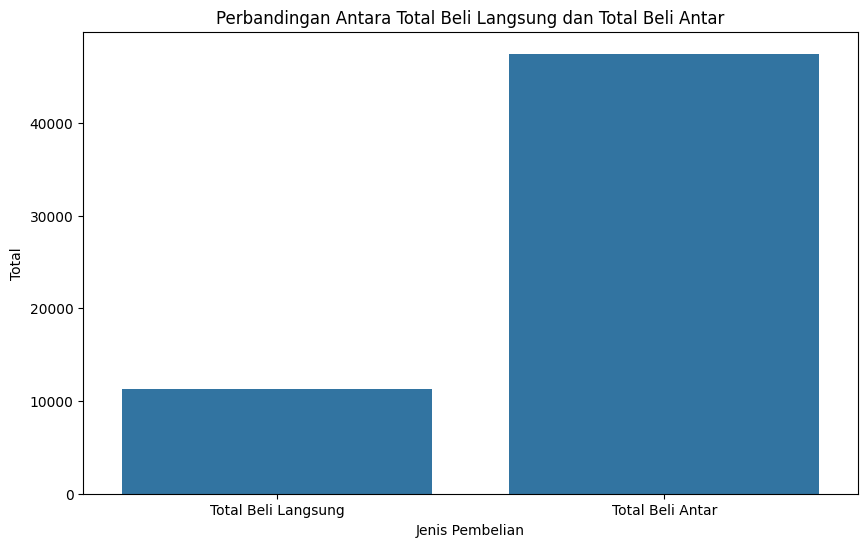

In [ ]:
# Bar Plot untuk Perbandingan Antara Total Beli Langsung dan Total Beli Antar
plt.figure(figsize=(10, 6))
sns.barplot(x=['Total Beli Langsung', 'Total Beli Antar'], y=[df['Total Beli Langsung'].sum(), df['Total Beli Antar'].sum()])
plt.title('Perbandingan Antara Total Beli Langsung dan Total Beli Antar')
plt.xlabel('Jenis Pembelian')
plt.ylabel('Total')
plt.show()

**Keterangan :** Pada grafik diatas menunjukkan bahwa total beli langsung lebih renda dengan memperoleh penjualan galon 10000 kebih, ketimbang total beli antar yang sangat signifikan dan lebih besar sebanyak penjualan melebihi 40000 galon dalam satu semester, artinya bisa kita lihat dari pola pelanggan lebih suka dan atau lebih banyak melakukan pembelian secara pengantaran ketimbang dengan beli langsung atau ditempat.

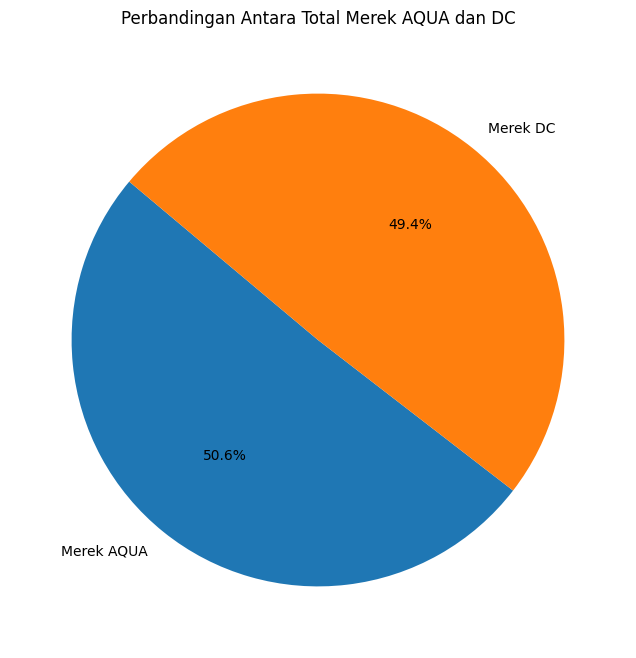

In [ ]:
# Pie Plot untuk Perbandingan Antara Total Merek AQUA dan DC
plt.figure(figsize=(8, 8))
plt.pie(df[['Merek AQUA', 'Merek DC']].sum(), labels=['Merek AQUA', 'Merek DC'], autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Antara Total Merek AQUA dan DC')
plt.show()

**Keterangan :** Dengan menggunakan pie plot, kita dapat dengan jelas melihat bagaimana pembagian atau komposisi dari total penjualan di antara kedua merek tersebut. Dari komposisi plot dari pelanggan melakukan pembelian galon, terlihat pelanggan lebih cenderung menggunakan galon bermerek Aqua ketimbang DC.

In [ ]:
# Mengonversi kolom Total Penjualan, Total Pengeluaran, dan Hasil Pendapatan ke dalam format string
df['Total Penjualan'] = df['Total Penjualan'].astype(str)
df['Total Pengeluaran'] = df['Total Pengeluaran'].astype(str)
df['Hasil Pendapatan'] = df['Hasil Pendapatan'].astype(str)

# Menghilangkan tulisan "Rp" di dalam kolom Total Penjualan, Total Pengeluaran, dan Hasil Pendapatan
df['Total Penjualan'] = df['Total Penjualan'].str.replace('Rp', '')
df['Total Pengeluaran'] = df['Total Pengeluaran'].str.replace('Rp', '')
df['Hasil Pendapatan'] = df['Hasil Pendapatan'].str.replace('Rp', '')

# Mengonversi kolom Total Penjualan, Total Pengeluaran, dan Hasil Pendapatan ke dalam tipe data numerik
df['Total Penjualan'] = pd.to_numeric(df['Total Penjualan'].str.replace('.', ''))
df['Total Pengeluaran'] = pd.to_numeric(df['Total Pengeluaran'].str.replace('.', ''))
df['Hasil Pendapatan'] = pd.to_numeric(df['Hasil Pendapatan'].str.replace('.', ''))

In [ ]:
df

,No,Tanggal Beli,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan
0,1,26/01/2023,72,58,130,298,428,228,200,2399000,1090000,1309000
1,2,27/01/2023,30,18,48,331,379,250,129,2976000,80000,2896000
2,3,28/01/2023,20,19,39,220,259,139,120,1525000,451000,1074000
3,4,29/01/2023,21,20,41,278,319,170,149,2098000,450000,1648000
4,5,30/01/2023,28,32,60,160,220,125,95,1357000,69000,1288000
...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,21/07/2023,30,36,66,287,353,176,177,2220000,1347000,873000
177,178,22/07/2023,24,33,57,294,351,175,176,2122000,251000,1871000
178,179,23/07/2023,33,30,63,239,302,151,151,2229000,173500,2055500
179,180,24/07/2023,27,48,75,214,289,144,145,1963000,390000,1573000


**Keterangan :** Pada data diatas hanya menampilkan beberapa kolom dan entri data. Memiliki 181 baris dan 12 kolom pada gambar diatas.

In [ ]:
# Mengonversi kolom 'Tanggal Beli' menjadi tipe data datetime jika belum
df['Tanggal Beli'] = pd.to_datetime(df['Tanggal Beli'])

# Menghitung total penjualan dari tanggal 26/01/2024 sampai 26/02/2024
total_penjualan_feb = df[(df['Tanggal Beli'] >= '2024-03-01') & (df['Tanggal Beli'] <= '2024-05-31')]['Total Penjualan'].sum()

print("Total Penjualan dari 26/01/2024 sampai 26/02/2024:", total_penjualan_feb)

<ipython-input-60-5575465db27a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




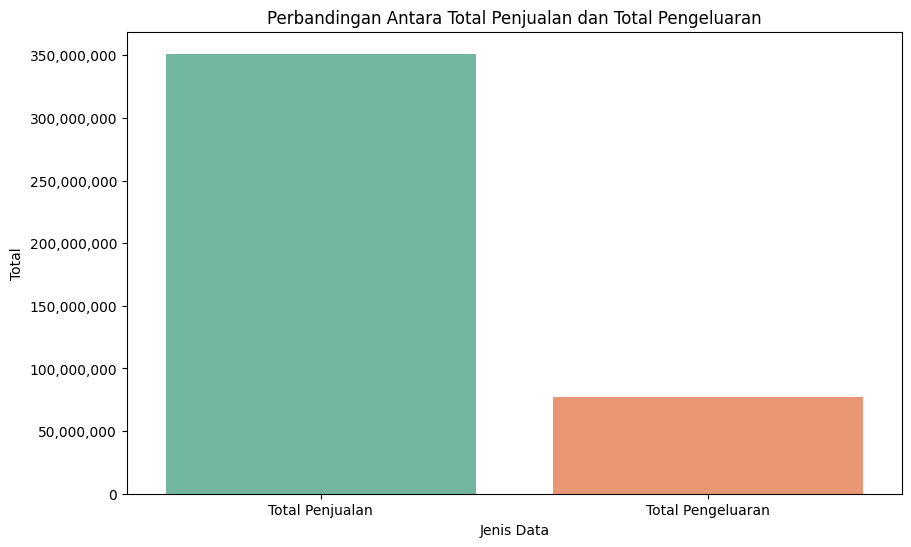

In [ ]:
# Bar Plot untuk Perbandingan Antara Total Penjualan dan Total Pengeluaran
plt.figure(figsize=(10, 6))
sns.barplot(x=['Total Penjualan', 'Total Pengeluaran'],
            y=[df['Total Penjualan'].sum(), df['Total Pengeluaran'].sum()],
            palette="Set2")
plt.title('Perbandingan Antara Total Penjualan dan Total Pengeluaran')
plt.xlabel('Jenis Data')
plt.ylabel('Total')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

**Keterangan :** Pada gambar diatas terlihat ada barplot dengan menampilkan data jenis data, yaitu total penjualan dan total pengeluaran serta total dari angka penjualan dan pengeluaran. Terlihat pada gambar diatas pada penjualan lebih besar dengan memporeleh menyentuh 350 juta ketimbang total pengeluaran hanya menyentuh rangen 50 juta sampai 100 juta dalam satu semester. Artinya, dari data tersebut dapat kita lihat untuk penjualan lebih besar diperoleh perusahaan ketimbangan pengeluarannya yang dilakukan.

<ipython-input-61-f8f7a8551d69>:4: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



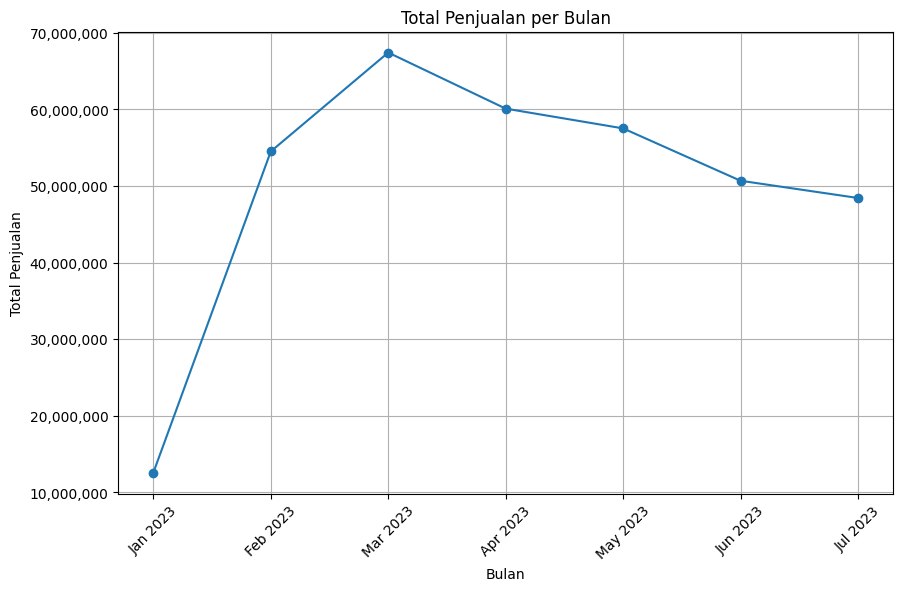

In [ ]:
# Line Chart untuk tren penjualan dari waktu ke waktu dengan kolom 'Tanggal Beli' dan 'Total Penjualan' per bulan

# Mengonversi kolom 'Tanggal Beli' menjadi tipe data datetime
df['Tanggal Beli'] = pd.to_datetime(df['Tanggal Beli'])

# Mengelompokkan tanggal beli per bulan dan menghitung total penjualan untuk setiap bulan
penjualan_per_bulan = df.resample('M', on='Tanggal Beli')['Total Penjualan'].sum().reset_index()

# Mengatur label bulan
bulan_labels = penjualan_per_bulan['Tanggal Beli'].dt.strftime('%b %Y')

# Visualisasi dengan line chart
plt.figure(figsize=(10, 6))
plt.plot(bulan_labels, penjualan_per_bulan['Total Penjualan'], marker='o')
plt.title('Total Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.grid(True)
plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.show()

# Mengonversi kolom 'Tanggal Beli' menjadi tipe data datetime
df['Tanggal Beli'] = pd.to_datetime(df['Tanggal Beli'])

# Menambahkan kolom 'Bulan' ke DataFrame df
df['Bulan'] = df['Tanggal Beli'].dt.strftime('%b %Y')

**Keterangan :** Pada diagram garis total penjualan perbulan dalam waktu kurun dari 1 semester diatas, terlihat dari bulan januari sampai bulan juli pada tahun 2023, pada bulan maret terjadi puncak tertinggi dalam penjualan sebesar kurang lebih sekitar 68 juta pada tahun 2023, dan terjadi penurunan setelah bulan maret untuk waktu penjualan terendah terjadi pada bulan juli 2023.

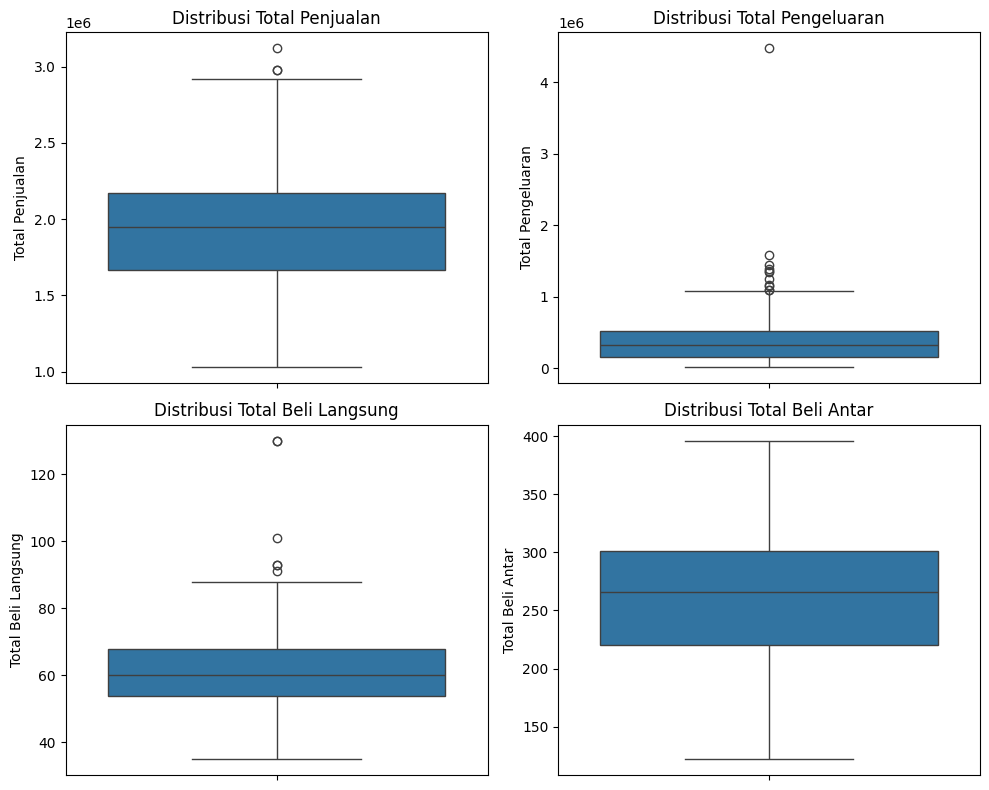

In [ ]:
# Boxplot (distribusi total penjualan, total pengeluaran, total beli langsung, dan total beli antar):

plt.figure(figsize=(10, 8))

# Boxplot untuk Total Penjualan
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Total Penjualan'])
plt.title('Distribusi Total Penjualan')
plt.ylabel('Total Penjualan')

# Boxplot untuk Total Pengeluaran
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Total Pengeluaran'])
plt.title('Distribusi Total Pengeluaran')
plt.ylabel('Total Pengeluaran')

# Boxplot untuk Total Beli Langsung
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Total Beli Langsung'])
plt.title('Distribusi Total Beli Langsung')
plt.ylabel('Total Beli Langsung')

# Boxplot untuk Total Beli Antar
plt.subplot(2, 2, 4)
sns.boxplot(y=df['Total Beli Antar'])
plt.title('Distribusi Total Beli Antar')
plt.ylabel('Total Beli Antar')

plt.tight_layout()
plt.show()


**Keterangan :** Gambar tersebut berisi empat box plot yang masing-masing mewakili distribusi yang berbeda beda. Berikut penjelasan masing - masing boxplot tersebut.


1.  “Total Penjualan” menunjukkan distribusi yang stabil dan tidak memiliki variasi yang signifikan, menunjukkan bahwa penjualan cenderung konsisten. Outliers dalam total penjualan bisa disebabkan oleh penjualan yang sangat tinggi pada periode tertentu, misalnya saat ada promosi atau event khusus. Selain itu, bisa juga disebabkan oleh pembelian dalam jumlah besar oleh beberapa pelanggan.


2. Sementara itu, “Total Pengeluaran” memiliki beberapa outlier, namun secara umum distribusinya juga stabil. Sedangkan untuk Outliers dalam total pengeluaran bisa disebabkan oleh pengeluaran yang tidak biasa atau biaya tak terduga lainnya.


3. Distribusi Total Beli Langsung: Distribusi ini menunjukkan bahwa kebanyakan pelanggan membeli dalam kisaran yang relatif seragam. Ini menunjukkan bahwa metode penjualan langsung cukup efektif dan diterima oleh sebagian besar pelanggan.


4. Distribusi Total Beli Antar: Distribusi ini menunjukkan konsistensi dalam layanan pembelian antar, menunjukkan bahwa layanan ini cukup efektif dan diterima oleh pelanggan.

Setiap box plot menunjukkan median (garis di dalam box), rentang interkuartil (box itu sendiri), dan rentang total (garis atau "whiskers" yang memanjang dari box), bersama dengan pencilan (lingkaran individu).

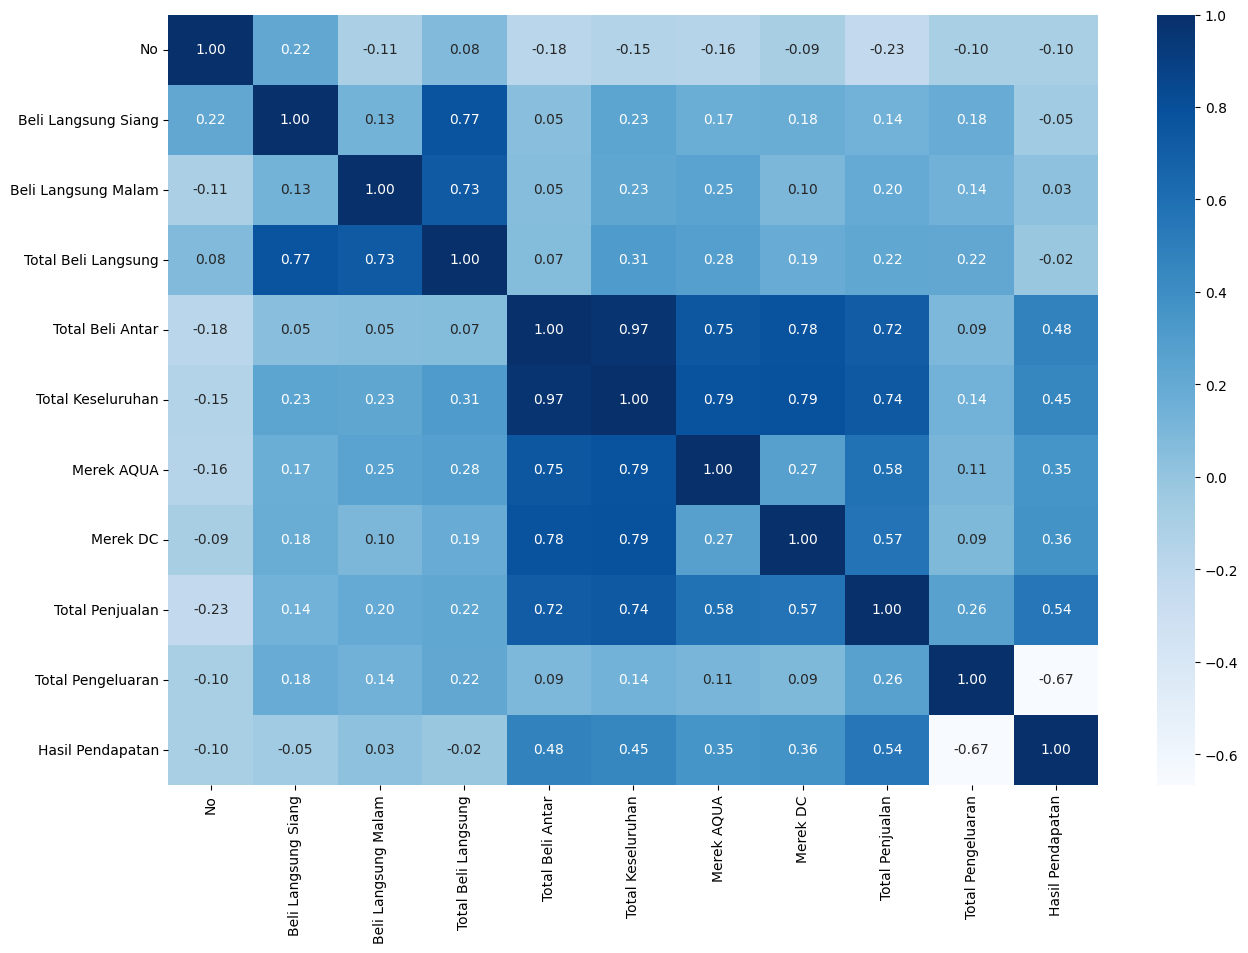

In [ ]:
# Korelasi Menggunakan Heatmap/Matriks Plot
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cbar=True, cmap="Blues")
plt.gcf().set_size_inches(15, 10)
plt.show()

**Keterangan** : Gambar yang Anda berikan adalah matriks heatmap yang menampilkan koefisien korelasi antara berbagai variabel. Variabel tersebut termasuk "No", "Beli Langsung Siang", "Beli Langsung Malam", "Total Beli Langsung", "Total Beli Antar", "Total Keseluruhan", "Merek AQUA", "Merek DC", "Total Penjualan", "Total Pengeluaran", dan "Hasil Pendapatan".

Setiap sel dalam matriks mewakili koefisien korelasi antara variabel yang bersilangan di sel tersebut. Nilai korelasi berkisar dari -1.0 hingga 1.0, di mana 1.0 menunjukkan korelasi positif sempurna, -1.0 menunjukkan korelasi negatif sempurna, dan nilai yang mendekati 0 menunjukkan korelasi yang lebih lemah.

Warna dalam heatmap bervariasi dari biru tua hingga biru muda, di mana warna yang lebih gelap menunjukkan korelasi positif yang lebih kuat dan warna yang lebih terang menunjukkan korelasi yang lebih lemah. Korelasi negatif juga ditunjukkan dengan warna biru muda.

Beberapa korelasi yang mencolok dari heatmap ini antara lain:

1. Korelasi positif yang kuat (0.97) antara Total Keseluruhan dan Total Beli Antar.
2. Korelasi positif yang kuat (0.79) antara Merek AQUA dan Total Beli Langsung.
3. Korelasi positif yang kuat (1.00) di sepanjang diagonal, yang merupakan korelasi setiap variabel dengan dirinya sendiri.
4. Korelasi negatif yang kuat (-0.67) antara Total Pengeluaran dan Hasil Pendapatan.

Heatmap ini adalah alat yang berguna untuk mengidentifikasi hubungan antara variabel dan dapat membantu dalam memahami dinamika data yang direpresentasikan

##**Verify Data Quality**

####Missing Values

In [ ]:
# Mendeteksi nilai NaN/Null (Kosong) pada DataFrame Appstore (Cara 1)
nan_count = df.isna().sum()

# Menampilkan jumlah nilai NaN/Null (Kosong) untuk setiap kolom
print("Jumlah nilai NaN untuk setiap kolom:")
print(nan_count)

Jumlah nilai NaN untuk setiap kolom:
No                     0
Tanggal Beli           0
Beli Langsung Siang    0
Beli Langsung Malam    0
Total Beli Langsung    0
Total Beli Antar       0
Total Keseluruhan      0
Merek AQUA             0
Merek DC               0
Total Penjualan        0
Total Pengeluaran      0
Hasil Pendapatan       0
Bulan                  0
dtype: int64


**Keterangan :** Pada hasil diatas terlihat pengecekkan missing values. Terlihat pada hasil diatas data tersebut tidak memiliki missing values dari setiap kolomnya.

In [ ]:
#Mengecek apakah ada nilai null di dataset atau tidak (Cara 2)
df.isnull().any()

No                     False
Tanggal Beli           False
Beli Langsung Siang    False
Beli Langsung Malam    False
Total Beli Langsung    False
Total Beli Antar       False
Total Keseluruhan      False
Merek AQUA             False
Merek DC               False
Total Penjualan        False
Total Pengeluaran      False
Hasil Pendapatan       False
Bulan                  False
dtype: bool

**Keterangan :** Pada hasil diatas terlihat pengecekkan missing values. Terlihat pada hasil diatas data tersebut tidak memiliki missing values dari setiap kolomnya.

####Outliers Values

In [ ]:
outlier_results = []

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Hanya mengambil kolom dengan tipe data numerik
        q1 = df[column].quantile(0.25)            # Menghitung nilai kuartil
        q3 = df[column].quantile(0.75)            # Menghitung nilai kuartil
        iqr = q3 - q1                             # Menghitung rentang interquartile (IQR)
        bts_bwh = q1 - 1.5 * iqr                  # Menghitung batas bawah dan batas atas untuk outlier
        bts_ats = q3 + 1.5 * iqr
        outliers = df[(df[column] < bts_bwh) | (df[column] > bts_ats)]    # Mencari outlier dalam kolom
        percent_outliers = (len(outliers) / len(df)) * 100                # Menghitung persentase outlier
        outlier_results.append({'Kolom': column, 'Persentase Outliers': percent_outliers})

# Membuat dataframe dari list hasil
outlier_df = pd.DataFrame(outlier_results)
outlier_df.set_index('Kolom', inplace=True)

display(outlier_df)


,Persentase Outliers
Kolom,
No,0.000000
Beli Langsung Siang,3.314917
Beli Langsung Malam,1.657459
Total Beli Langsung,3.314917
Total Beli Antar,0.000000
Total Keseluruhan,0.000000
Merek AQUA,1.657459
Merek DC,0.000000
Total Penjualan,1.657459


####Duplicated Values

Tabel di atas menggambarkan persentase outlier dalam setiap kolom dataset. Berikut adalah penjelasan untuk setiap kolom:


1. **No:**
   Tidak ada outlier dalam kolom ini, menunjukkan bahwa tidak ada nomor entri yang secara signifikan berbeda dari yang lain.

2. **Beli Langsung Siang:**
   Terdapat outlier sebesar 3.31% dalam kolom ini, menunjukkan bahwa ada beberapa nilai jumlah pembelian langsung pada siang hari yang berbeda secara signifikan dari yang lain.

3. **Beli Langsung Malam:**
   Terdapat outlier sebesar 1.66% dalam kolom ini, menunjukkan bahwa ada beberapa nilai jumlah pembelian langsung pada malam hari yang berbeda secara signifikan dari yang lain.

4. **Total Beli Langsung:**
   Terdapat outlier sebesar 3.31% dalam kolom ini, menunjukkan bahwa ada beberapa nilai total pembelian langsung yang berbeda secara signifikan dari yang lain.

5. **Total Beli Antar:**
   Tidak ada outlier dalam kolom ini, menunjukkan bahwa tidak ada nilai total pembelian antar yang secara signifikan berbeda dari yang lain.

6. **Total Keseluruhan:**
   Tidak ada outlier dalam kolom ini, menunjukkan bahwa tidak ada nilai total keseluruhan yang secara signifikan berbeda dari yang lain.

7. **Merek AQUA:**
   Terdapat outlier sebesar 1.66% dalam kolom ini, menunjukkan bahwa ada beberapa nilai jumlah penjualan untuk merek AQUA yang berbeda secara signifikan dari yang lain.

8. **Merek DC:**
   Tidak ada outlier dalam kolom ini, menunjukkan bahwa tidak ada nilai jumlah penjualan untuk merek DC yang secara signifikan berbeda dari yang lain.

9. **Total Penjualan:**
   Terdapat outlier sebesar 1.66% dalam kolom ini, menunjukkan bahwa ada beberapa nilai total penjualan yang berbeda secara signifikan dari yang lain.

10. **Total Pengeluaran:**
    Terdapat outlier sebesar 6.08% dalam kolom ini, menunjukkan bahwa ada beberapa nilai total pengeluaran yang berbeda secara signifikan dari yang lain.

11. **Hasil Pendapatan:**
    Terdapat outlier sebesar 4.97% dalam kolom ini, menunjukkan bahwa ada beberapa nilai hasil pendapatan yang berbeda secara signifikan dari yang lain.

In [ ]:
# Kode untuk mengecek apakah ada nilai duplikat pada tiap kolom di dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
176    False
177    False
178    False
179    False
180    False
Length: 181, dtype: bool

Berdasarkan hasil dari analisis awal serta output diatas, dapat disimpulkan bahwa data tersebut menunjukkan kualitas yang baik karena tidak mengandung nilai yang kosong atau duplikat. Sehingga, dataset ini tidak memerlukan tindakan lebih lanjut terkait dengan duplikasi data.

####Inconsistent Values / Noise (Optional)

In [ ]:
[print(f"Columns -> {col}\n{df[col].unique()}\n{'-' * 30}\n") for col in df.columns]

Columns -> No
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181]
------------------------------

Columns -> Tanggal Beli
<DatetimeArray>
['2023-01-26 00:00:00', '2023-01-27 00:00:00', '2023-01-28 00:00:00',
 '2023-01-29 00:00:00', '2023-01-30 00:00:00', '2023-01-31 00:00:00',
 '2023-02-01 00:00:00', '2023-02-02 00

[None, None, None, None, None, None, None, None, None, None, None, None, None]

Tidak terlihat adanya nilai yang inkonsisten atau noise yang dapat diamati secara langsung dari output tersebut. Semua kolom memiliki nilai yang sesuai dengan jenis data yang diharapkan, tanpa adanya anomali yang mencolok.

#**Data Preparation (Persiapan Data)**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 No                     0
Tanggal Beli           0
Beli Langsung Siang    0
Beli Langsung Malam    0
Total Beli Langsung    0
Total Beli Antar       0
Total Keseluruhan      0
Merek AQUA             0
Merek DC               0
Total Penjualan        0
Total Pengeluaran      0
Hasil Pendapatan       0
Bulan                  0
dtype: int64


Hasil pengecekan tersebut menunjukkan bahwa tidak ada nilai yang hilang dalam DataFrame. Semua kolom telah terisi dengan lengkap, sehingga tidak ditemukan kebutuhan untuk menangani atau mengisi nilai yang hilang dalam tahap pra-pemrosesan data.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
duplicate_rows=df[df.duplicated()]

In [ ]:
print(duplicate_rows)

Empty DataFrame
Columns: [No, Tanggal Beli, Beli Langsung Siang, Beli Langsung Malam, Total Beli Langsung, Total Beli Antar, Total Keseluruhan, Merek AQUA, Merek DC, Total Penjualan, Total Pengeluaran, Hasil Pendapatan, Bulan]
Index: []


Hasil pengecekan menunjukkan bahwa tidak ada baris yang dianggap sebagai duplikat dalam dataset. Dalam outputnya, tidak ada baris yang terdaftar karena tidak ada duplikasi yang ditemukan. Ini menunjukkan bahwa setiap baris dalam dataset memiliki keunikan sendiri dan tidak ada yang sama persis dengan yang lain.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
No,0.000000
Beli Langsung Siang,3.314917
Beli Langsung Malam,1.657459
Total Beli Langsung,3.314917
Total Beli Antar,0.000000
Total Keseluruhan,0.000000
Merek AQUA,1.657459
Merek DC,0.000000
Total Penjualan,1.657459
Total Pengeluaran,6.077348


Output tersebut menampilkan persentase outliers untuk setiap kolom dalam dataset. Jika persentase outliers rendah (dekat dengan nol), artinya mayoritas data berada dalam kisaran yang normal. Namun, jika persentase outliers tinggi, maka bisa menandakan bahwa beberapa data dalam kolom memiliki nilai yang sangat ekstrem.

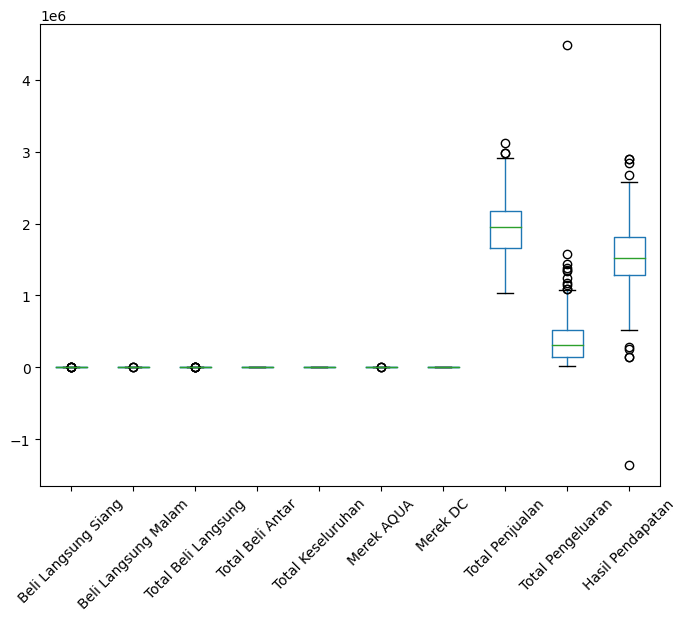

In [ ]:
boxplot = df.drop('No', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan grafik diatas, terlihat pola persebaran data atau nilai outliers. Bisa dilihat jika kolom 'Total Pengeluaran' memiliki nilai outliers yang terlihat sebagai titik-titik di luar "whiskers" (jangkauan didalam box plot) atau jauh dari Q1 dan Q3. Outliers ini menunjukkan adanya nilai-nilai yang sangat berbeda dari mayoritas data dalam kolom 'Total Pengeluaran'.

Tidak dilakukan imputasi maupun penghapusan outliers dikarenakan kolom total pengeluaran memiliki sifat yang sangat penting dalam analisis ini, oleh karena itu kolom tersebut tidak dihapus.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
# Kategorisasi volume penjualan
def categorize_sales(volume):
    if volume < 200:
        return 'Rendah'
    elif 200 <= volume < 300:
        return 'Sedang'
    elif volume >= 300:
        return 'Tinggi'
    else:
        return 'Data tidak valid'

df['Kategori Penjualan'] = df['Total Keseluruhan'].apply(categorize_sales)

# Kategorisasi hasil pendapatan
def categorize_income(income):
    if income < 1000000:
        return 'Tidak Stabil'
    elif 1000000 <= income < 2000000:
        return 'Cukup'
    elif income >= 2000000:
        return 'Stabil'
    else:
        return 'Data tidak valid'

df['Kategori Pendapatan'] = df['Hasil Pendapatan'].apply(categorize_income)


Setelah menganalisis dataset ini, kami menemukan kebutuhan untuk melakukan penyesuaian fitur tambahan guna meningkatkan kualitas analisis dan kinerja model. Sebagai bagian dari upaya tersebut, kami melakukan rekayasa fitur (Feature Engineering) untuk beberapa kolom, termasuk kolom yang Anda sebutkan.

Pertama-tama, kolom `Total Keseluruhan` telah kami kategorikan menjadi `Kategori Penjualan` dengan tiga kategori: Rendah, Sedang, dan Tinggi. Sedangkan untuk kolom `Hasil Pendapatan`, kami mengkategorikan pendapatan menjadi `Kategori Pendapatan` dengan tiga kategori: Tidak Stabil, Cukup, dan Stabil.

Penyesuaian ini kami lakukan untuk memperkaya informasi yang tersedia, memfasilitasi analisis yang lebih mendalam, serta meningkatkan kinerja model pada data yang kami hadapi. Dengan demikian, kami berharap dapat memperoleh wawasan yang lebih baik dari data dan meningkatkan hasil analisis serta prediksi yang kami lakukan.

In [ ]:
df

,No,Tanggal Beli,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Total Keseluruhan,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan,Bulan,Kategori Penjualan,Kategori Pendapatan
0,1,2023-01-26,72,58,130,298,428,228,200,2399000,1090000,1309000,Jan 2023,Tinggi,Cukup
1,2,2023-01-27,30,18,48,331,379,250,129,2976000,80000,2896000,Jan 2023,Tinggi,Stabil
2,3,2023-01-28,20,19,39,220,259,139,120,1525000,451000,1074000,Jan 2023,Sedang,Cukup
3,4,2023-01-29,21,20,41,278,319,170,149,2098000,450000,1648000,Jan 2023,Tinggi,Cukup
4,5,2023-01-30,28,32,60,160,220,125,95,1357000,69000,1288000,Jan 2023,Sedang,Cukup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,2023-07-21,30,36,66,287,353,176,177,2220000,1347000,873000,Jul 2023,Tinggi,Tidak Stabil
177,178,2023-07-22,24,33,57,294,351,175,176,2122000,251000,1871000,Jul 2023,Tinggi,Cukup
178,179,2023-07-23,33,30,63,239,302,151,151,2229000,173500,2055500,Jul 2023,Tinggi,Stabil
179,180,2023-07-24,27,48,75,214,289,144,145,1963000,390000,1573000,Jul 2023,Sedang,Cukup


**Keterangan :** Pada data diatas penampilan data setelah melakukan berbagai tahap yang telah dilakukan terdapat tambahan kolom, yaitu kolom kategori penjulan dan kategori pendapatan, sehingga untuk saat ini data terdapat 181 baris dan 15 kolom.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Grafik ini adalah heatmap yang digunakan untuk menunjukkan korelasi antara berbagai variabel bisnis. Warna-warna pada heatmap menunjukkan kekuatan dan arah korelasi: warna yang lebih terang (kuning) menandakan korelasi positif yang kuat, warna yang lebih gelap (ungu) menunjukkan korelasi negatif, dan warna-warna antara (misalnya oranye) menandakan korelasi yang lemah atau netral. Setiap sel pada heatmap menunjukkan korelasi antara variabel pada baris dan kolomnya, misalnya, antara "Beli Langsung Siang" dan "Total Penjualan" atau antara "Merek DC" dan "Hasil Pendapatan". Keterangan pada grafik menunjukkan bahwa variabel-variabel seperti total pembelian (langsung dan antar), penjualan berdasarkan merek (AQUA dan DC), total penjualan, pengeluaran, dan hasil pendapatan semuanya diukur dan dibandingkan untuk menilai hubungan antar aktivitas bisnis. Heatmap ini membantu dalam mengidentifikasi pola-pola korelasi yang dapat digunakan untuk pengambilan keputusan strategis, misalnya, memahami variabel mana yang paling mempengaruhi hasil pendapatan atau mana yang paling tidak berpengaruh terhadap pengeluaran.

In [ ]:
print(df.columns)

Index(['No', 'Tanggal Beli', 'Beli Langsung Siang', 'Beli Langsung Malam',
       'Total Beli Langsung', 'Total Beli Antar', 'Total Keseluruhan',
       'Merek AQUA', 'Merek DC', 'Total Penjualan', 'Total Pengeluaran',
       'Hasil Pendapatan', 'Bulan', 'Kategori Penjualan',
       'Kategori Pendapatan'],
      dtype='object')


In [ ]:
df = df.drop(['No', 'Tanggal Beli', 'Total Keseluruhan'], axis=1)

In [ ]:
df

,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan,Bulan,Kategori Penjualan,Kategori Pendapatan
0,72,58,130,298,228,200,2399000,1090000,1309000,Jan 2023,Tinggi,Cukup
1,30,18,48,331,250,129,2976000,80000,2896000,Jan 2023,Tinggi,Stabil
2,20,19,39,220,139,120,1525000,451000,1074000,Jan 2023,Sedang,Cukup
3,21,20,41,278,170,149,2098000,450000,1648000,Jan 2023,Tinggi,Cukup
4,28,32,60,160,125,95,1357000,69000,1288000,Jan 2023,Sedang,Cukup
...,...,...,...,...,...,...,...,...,...,...,...,...
176,30,36,66,287,176,177,2220000,1347000,873000,Jul 2023,Tinggi,Tidak Stabil
177,24,33,57,294,175,176,2122000,251000,1871000,Jul 2023,Tinggi,Cukup
178,33,30,63,239,151,151,2229000,173500,2055500,Jul 2023,Tinggi,Stabil
179,27,48,75,214,144,145,1963000,390000,1573000,Jul 2023,Sedang,Cukup


Penghapusan kolom dari dataset dilakukan karena:

Kolom "No" dihapus karena tidak memberikan informasi yang signifikan atau relevan untuk analisis yang sedang dilakukan. Nomor urut atau identifikasi tidak mempengaruhi pemahaman atau pemodelan fitur-fitur penting dalam dataset, sehingga penghapusan kolom ini dapat menyederhanakan dataset dan meningkatkan efisiensi analisis.

Kolom "Tanggal Beli" dihapus karena tanggal pembelian tidak relevan dengan fokus penelitian atau analisis yang sedang dilakukan. Informasi ini sudah tidak memberikan kontribusi yang signifikan terhadap pemahaman atau modelisasi data yang sedang dilakukan. Dengan demikian, kolom tersebut dihilangkan untuk menyederhanakan dataset dan fokus pada fitur-fitur yang lebih relevan.

Kolom "Total Keseluruhan" dihapus karena total keseluruhan tidak memiliki hubungan dengan fokus penelitian atau analisis yang sedang dilakukan. Informasi ini tidak memberikan kontribusi yang signifikan terhadap pemahaman atau modelisasi data yang sedang dilakukan. Dengan demikian, kolom tersebut dihilangkan untuk menyederhanakan dataset dan fokus pada fitur-fitur yang lebih relevan.

#**Data Transformation**

###**Mapping**

In [ ]:
# Pemetaan kategori penjualan
df['Kategori Penjualan'] = df['Kategori Penjualan'].map({'Rendah': 0, 'Sedang': 1, 'Tinggi': 2}).astype(int)

# Pemetaan kategori pendapatan
df['Kategori Pendapatan'] = df['Kategori Pendapatan'].map({'Tidak Stabil': 0, 'Cukup': 1, 'Stabil': 2}).astype(int)

**Keterangan :**

total keseluruhan = kategori penjualan

hasil pendapatan = kategori pendapatan

Mapping dilakukan untuk mengonversi nilai-nilai kategori dalam dataset menjadi representasi numerik. Dalam konteks ini, kolom "Kategori Penjualan" dan "Kategori Pendapatan" diubah menjadi nilai numerik untuk merepresentasikan kategori penjualan dan pendapatan.

Kolom "Kategori Penjualan" diubah menjadi nilai numerik untuk merepresentasikan kategori penjualan, mengubah 'Rendah', 'Sedang', dan 'Tinggi' menjadi nilai 0, 1, dan 2. Sedangkan kolom "Kategori Pendapatan" diubah menjadi nilai numerik untuk merepresentasikan kategori pendapatan, mengubah 'Tidak Stabil', 'Cukup', dan 'Stabil' menjadi nilai 0, 1, dan 2.

Ini memungkinkan analisis data yang lebih efisien dengan mengonversi kategori-kategori tersebut menjadi angka-angka, sehingga mempermudah perhitungan statistik dan pemodelan data.

In [ ]:
df

,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan,Bulan,Kategori Penjualan,Kategori Pendapatan
0,72,58,130,298,228,200,2399000,1090000,1309000,Jan 2023,2,1
1,30,18,48,331,250,129,2976000,80000,2896000,Jan 2023,2,2
2,20,19,39,220,139,120,1525000,451000,1074000,Jan 2023,1,1
3,21,20,41,278,170,149,2098000,450000,1648000,Jan 2023,2,1
4,28,32,60,160,125,95,1357000,69000,1288000,Jan 2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
176,30,36,66,287,176,177,2220000,1347000,873000,Jul 2023,2,0
177,24,33,57,294,175,176,2122000,251000,1871000,Jul 2023,2,1
178,33,30,63,239,151,151,2229000,173500,2055500,Jul 2023,2,2
179,27,48,75,214,144,145,1963000,390000,1573000,Jul 2023,1,1


Tabel diatas merupakan hasil dari proses mapping nilai kategorikal ke nilai numerik dalam dataset. Setiap kolom yang sebelumnya berisi nilai kategorikal sekarang telah diubah menjadi nilai numerik sesuai dengan aturan yang ditetapkan dalam proses mapping.

In [ ]:
df.to_csv('Data Cleaned.csv')

In [ ]:
df

,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan,Bulan,Kategori Penjualan,Kategori Pendapatan
0,72,58,130,298,228,200,2399000,1090000,1309000,Jan 2023,2,1
1,30,18,48,331,250,129,2976000,80000,2896000,Jan 2023,2,2
2,20,19,39,220,139,120,1525000,451000,1074000,Jan 2023,1,1
3,21,20,41,278,170,149,2098000,450000,1648000,Jan 2023,2,1
4,28,32,60,160,125,95,1357000,69000,1288000,Jan 2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
176,30,36,66,287,176,177,2220000,1347000,873000,Jul 2023,2,0
177,24,33,57,294,175,176,2122000,251000,1871000,Jul 2023,2,1
178,33,30,63,239,151,151,2229000,173500,2055500,Jul 2023,2,2
179,27,48,75,214,144,145,1963000,390000,1573000,Jul 2023,1,1


#**DATA MODELLING**

Modelling dalam dataset ini menggunakan Modelling Associate.

##**Inisiasi Variabel untuk menyimpan Dataframe**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

Kode di atas menggunakan pustaka scikit-learn untuk melakukan analisis klastering. Dengan menggabungkan langkah-langkah pemrosesan data dan pemodelan menggunakan `Pipeline`, fitur-fitur dalam dataset diolah dengan penskalaan menggunakan `StandardScaler`, dan kemudian dikelompokkan menjadi beberapa klaster menggunakan algoritma KMeans atau AgglomerativeClustering. Visualisasi interaktif dari hasil klastering dapat dibuat dengan menggunakan `plotly.express`, memungkinkan analisis yang lebih mendalam terhadap struktur data yang terklaster.

In [ ]:
df_clean = df.dropna(subset=['Beli Langsung Siang', 'Beli Langsung Malam', 'Total Beli Langsung', 'Total Beli Antar', 'Total Penjualan', 'Total Pengeluaran', 'Hasil Pendapatan', 'Kategori Penjualan'])

Kode di atas digunakan untuk membersihkan dataframe dari baris-baris yang memiliki nilai yang hilang (NaN) dalam salah satu dari kolom 'Beli Langsung Siang', 'Beli Langsung Malam', 'Total Beli Langsung', 'Total Beli Antar', 'Total Penjualan', 'Total Pengeluaran', 'Hasil Pendapatan', atau 'Kategori Penjualan'. Variabel `df_clean` akan berisi dataframe yang merupakan versi 'bersih' dari dataframe asli `df`, di mana baris-baris yang memiliki nilai yang hilang dalam salah satu dari kolom yang disebutkan telah dihapus. Ini bertujuan untuk memastikan bahwa analisis data selanjutnya dapat dilakukan pada data yang lengkap tanpa adanya nilai yang hilang, sehingga meminimalkan potensi distorsi atau kesalahan dalam hasil analisis.

In [ ]:
features = ['Beli Langsung Siang', 'Beli Langsung Malam', 'Total Beli Langsung', 'Total Beli Antar', 'Total Penjualan', 'Total Pengeluaran', 'Hasil Pendapatan', 'Kategori Penjualan']

Variabel `features` adalah sebuah daftar yang berisi nama-nama fitur yang akan digunakan dalam analisis atau pemodelan data selanjutnya. Daftar ini mencakup kolom-kolom 'Beli Langsung Siang', 'Beli Langsung Malam', 'Total Beli Langsung', 'Total Beli Antar', 'Total Penjualan', 'Total Pengeluaran', 'Hasil Pendapatan', dan 'Kategori Penjualan'. Dengan menyimpan nama-nama fitur ini dalam satu variabel, pengguna dapat dengan mudah merujuk ke fitur-fitur tersebut dalam berbagai operasi analisis data, seperti pemilihan fitur untuk pemodelan, visualisasi data, atau operasi pemrosesan data lainnya. Hal ini memberikan fleksibilitas dan kemudahan dalam mengelola dan menggunakan fitur-fitur yang relevan dalam analisis data.

In [ ]:
X = df_clean[features]

Variabel X akan berisi dataframe baru yang hanya terdiri dari kolom-kolom yang sesuai dengan fitur-fitur yang telah ditentukan sebelumnya dalam variabel features.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Kode di atas menggunakan objek StandardScaler dari pustaka scikit-learn untuk melakukan penskalaan fitur-fitur dalam dataset X. Penskalaan dilakukan agar setiap fitur memiliki rata-rata nol dan varians satu, sehingga memudahkan dalam pemrosesan dan pemodelan data dengan menghasilkan distribusi data yang lebih seragam dan dapat diinterpretasikan dengan lebih baik.

Text(0.5, 1.0, 'Metode Elbow untuk K Optimal')

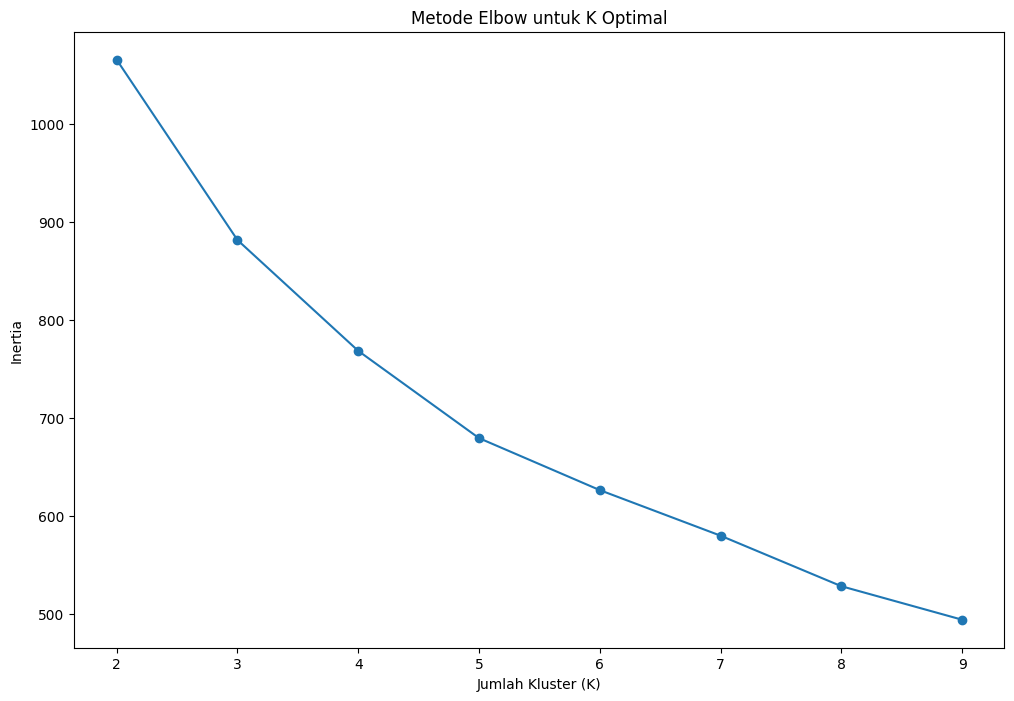

In [ ]:
inertia_values = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk K Optimal')

Output dari syntax tersebut dapat digunakan untuk menemukan titik di mana penambahan jumlah cluster tidak memberikan penurunan yang signifikan dalam inertia (jumlah total jarak kuadrat antara titik data dan pusat cluster terdekat).

Grafik ini menampilkan metode Elbow yang digunakan untuk menentukan jumlah kluster optimal dalam analisis kluster. Pada sumbu Y, terdapat nilai "inertia," yang menggambarkan jumlah variasi dalam data yang tidak dijelaskan oleh kluster, dengan nilai yang lebih rendah menunjukkan penyesuaian kluster yang lebih baik. Sumbu X menunjukkan jumlah kluster (K). Dapat diamati bahwa saat jumlah kluster meningkat dari 2 hingga 9, nilai inertia menurun secara signifikan, menunjukkan bahwa penambahan kluster menghasilkan model yang lebih cocok. Titik di mana penurunan nilai inertia mulai melambat atau menjadi lebih landai biasanya dianggap sebagai jumlah kluster yang optimal. Dari grafik, tampak bahwa titik "siku" yang menunjukkan perubahan terbesar dalam laju penurunan inertia berada pada angka 3. sehingga jumlah kluster yang disarankan  berada dalam kluster 3 tersebut.

In [ ]:
pipeline_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

Kode tersebut membuat alur kerja yang menggunakan penskalaan fitur dengan StandardScaler dan menerapkan algoritma KMeans dengan 3 klaster pada data yang telah disesuaikan, dengan tujuan untuk mengelompokkan data menjadi tiga kelompok berbeda berdasarkan pola yang terdapat dalam data.

In [ ]:
pipeline_hc = Pipeline([
    ('scaler', StandardScaler()),
    ('hc', AgglomerativeClustering(n_clusters=3))
])

Kode di atas menginisialisasi sebuah pipeline dengan menggunakan StandardScaler untuk penskalaan fitur dan kemudian menerapkan algoritma AgglomerativeClustering dengan 3 klaster pada data yang telah disesuaikan. Tujuannya adalah untuk mengelompokkan data menjadi tiga kelompok berbeda berdasarkan pola yang ada, dengan memperhatikan hubungan hierarkis antara titik data.

In [ ]:
pipeline_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

Kode diatas digunakan untuk melatih atau mengaplikasikan pipeline yang telah di definisikan sebelumnya ke data yang telah dipersiapkan, yaitu X.

In [ ]:
pipeline_hc.fit(X_scaled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('hc', AgglomerativeClustering(n_clusters=3))])

Kode tersebut digunakan untuk melatih pipeline yang telah disiapkan sebelumnya dengan data yang telah disesuaikan dan diskalakan, X_scaled, sehingga algoritma AgglomerativeClustering dapat diterapkan untuk mengelompokkan data menjadi tiga klaster berdasarkan pola yang terdapat dalam data.

In [ ]:
df_clean['cluster_kmeans'] = pipeline_kmeans.named_steps['kmeans'].labels_

Kode tersebut digunakan untuk menambahkan kolom baru ke dalam dataframe yang berisi label klaster hasil dari pengelompokan data menggunakan algoritma KMeans yang telah dilatih sebelumnya melalui pipeline.

In [ ]:
df_clean['cluster_hierarchical'] = pipeline_hc.named_steps['hc'].labels_

Kode tersebut digunakan untuk menambahkan kolom baru ke dalam dataframe yang berisi label klaster hasil dari pengelompokan data menggunakan algoritma AgglomerativeClustering yang telah dilatih sebelumnya melalui pipeline.

In [ ]:
df_clean

,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan,Bulan,Kategori Penjualan,Kategori Pendapatan,cluster_kmeans,cluster_hierarchical
0,72,58,130,298,228,200,2399000,1090000,1309000,Jan 2023,2,1,2,0
1,30,18,48,331,250,129,2976000,80000,2896000,Jan 2023,2,2,1,2
2,20,19,39,220,139,120,1525000,451000,1074000,Jan 2023,1,1,0,1
3,21,20,41,278,170,149,2098000,450000,1648000,Jan 2023,2,1,1,2
4,28,32,60,160,125,95,1357000,69000,1288000,Jan 2023,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,30,36,66,287,176,177,2220000,1347000,873000,Jul 2023,2,0,1,2
177,24,33,57,294,175,176,2122000,251000,1871000,Jul 2023,2,1,1,2
178,33,30,63,239,151,151,2229000,173500,2055500,Jul 2023,2,2,1,2
179,27,48,75,214,144,145,1963000,390000,1573000,Jul 2023,1,1,0,1


Kode tersebut digunakan untuk menampilkan dataframe yang telah dibersihkan dan telah ditambahkan kolom-kolom baru yang berisi label klaster hasil dari pengelompokan data menggunakan algoritma KMeans dan AgglomerativeClustering.

## **Visualisasi Kmeans Cluster**

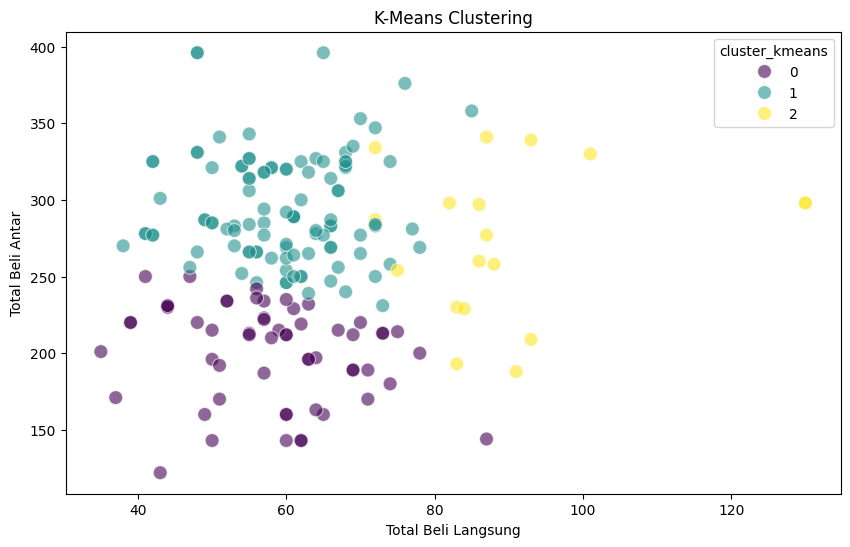

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Total Beli Langsung', y='Total Beli Antar', hue='cluster_kmeans', palette='viridis', s=100, alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Total Beli Langsung')
plt.ylabel('Total Beli Antar')
plt.show()

Grafik ini menggambarkan hasil analisis klustering menggunakan metode K-Means, yang memetakan data ke dalam tiga kluster yang berbeda, masing-masing dilambangkan dengan warna ungu, hijau, dan kuning. Sumbu X menunjukkan "Total Beli Langsung," yang bisa diinterpretasikan sebagai jumlah total pembelian yang dilakukan oleh pelanggan secara langsung, sedangkan sumbu Y menunjukkan "Total Beli Antar," yang bisa diinterpretasikan sebagai jumlah total pembelian yang diantarkan kepada pelanggan. Titik-titik berwarna ungu, hijau, dan kuning mewakili kelompok pelanggan yang berbeda berdasarkan perilaku pembelian mereka. Kluster ungu berfokus pada nilai-nilai lebih rendah di kedua sumbu, menunjukkan pelanggan dengan total beli yang lebih sedikit baik langsung maupun diantar. Kluster hijau terletak di tengah, menunjukkan tingkat pembelian yang sedang, dan kluster kuning pada sisi kanan atas, menunjukkan pelanggan dengan total pembelian langsung yang tinggi namun variatif dalam pembelian diantar. Ini membantu dalam memahami pola pembelian pelanggan dan mengoptimalkan strategi penjualan dan distribusi berdasarkan perilaku grup pelanggan ini.

## **Visualisasi Hierarchical Cluster**

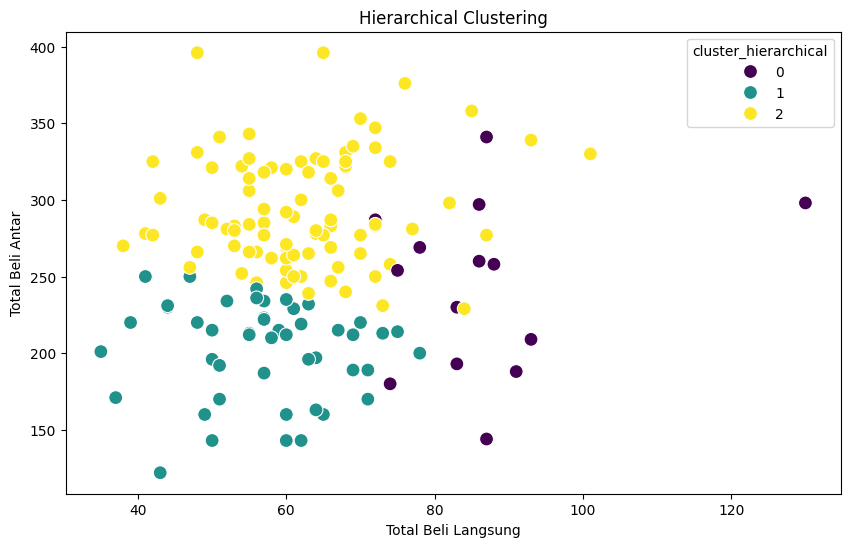

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Total Beli Langsung', y='Total Beli Antar', hue='cluster_hierarchical', palette='viridis', s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Total Beli Langsung')
plt.ylabel('Total Beli Antar')
plt.show()

Grafik ini menampilkan hasil dari analisis klustering hierarkis, sebuah metode yang mengelompokkan data berdasarkan tingkat kemiripan mereka. Pada grafik, terlihat tiga kelompok pelanggan yang direpresentasikan oleh tiga warna berbeda: hijau, kuning, dan ungu. Sumbu X menunjukkan "Total Beli Langsung," yang mengindikasikan jumlah pembelian yang dilakukan pelanggan secara langsung, sedangkan sumbu Y menunjukkan "Total Beli Antar," yang menggambarkan jumlah pembelian yang diantar ke pelanggan. Kluster hijau umumnya memiliki nilai rendah pada kedua sumbu, menunjukkan pelanggan dengan volume pembelian yang rendah. Kluster kuning terfokus pada nilai yang lebih tinggi pada kedua sumbu, mengindikasikan pelanggan dengan volume pembelian yang tinggi. Sementara itu, kluster ungu cenderung terpisah dari dua kelompok lainnya dan terletak di sudut kanan atas grafik, mungkin menunjukkan pelanggan dengan karakteristik pembelian yang sangat berbeda atau unik dibandingkan dengan dua kluster lainnya.

## **KMeans**

In [ ]:
frekuensi_model = df_clean.groupby(['Bulan', 'cluster_kmeans']).size().reset_index(name='frekuensi')

Kode tersebut digunakan untuk menghitung frekuensi masing-masing klaster hasil dari pengelompokan data menggunakan algoritma KMeans, yang telah dilakukan berdasarkan bulan pada dataframe yang telah dibersihkan.

In [ ]:
frekuensi_model_terurut = frekuensi_model.sort_values(by='frekuensi', ascending=False)

Kode tersebut digunakan untuk menyortir dataframe `frekuensi_model` berdasarkan kolom 'frekuensi' secara menurun, sehingga klaster dengan frekuensi yang lebih tinggi muncul terlebih dahulu.

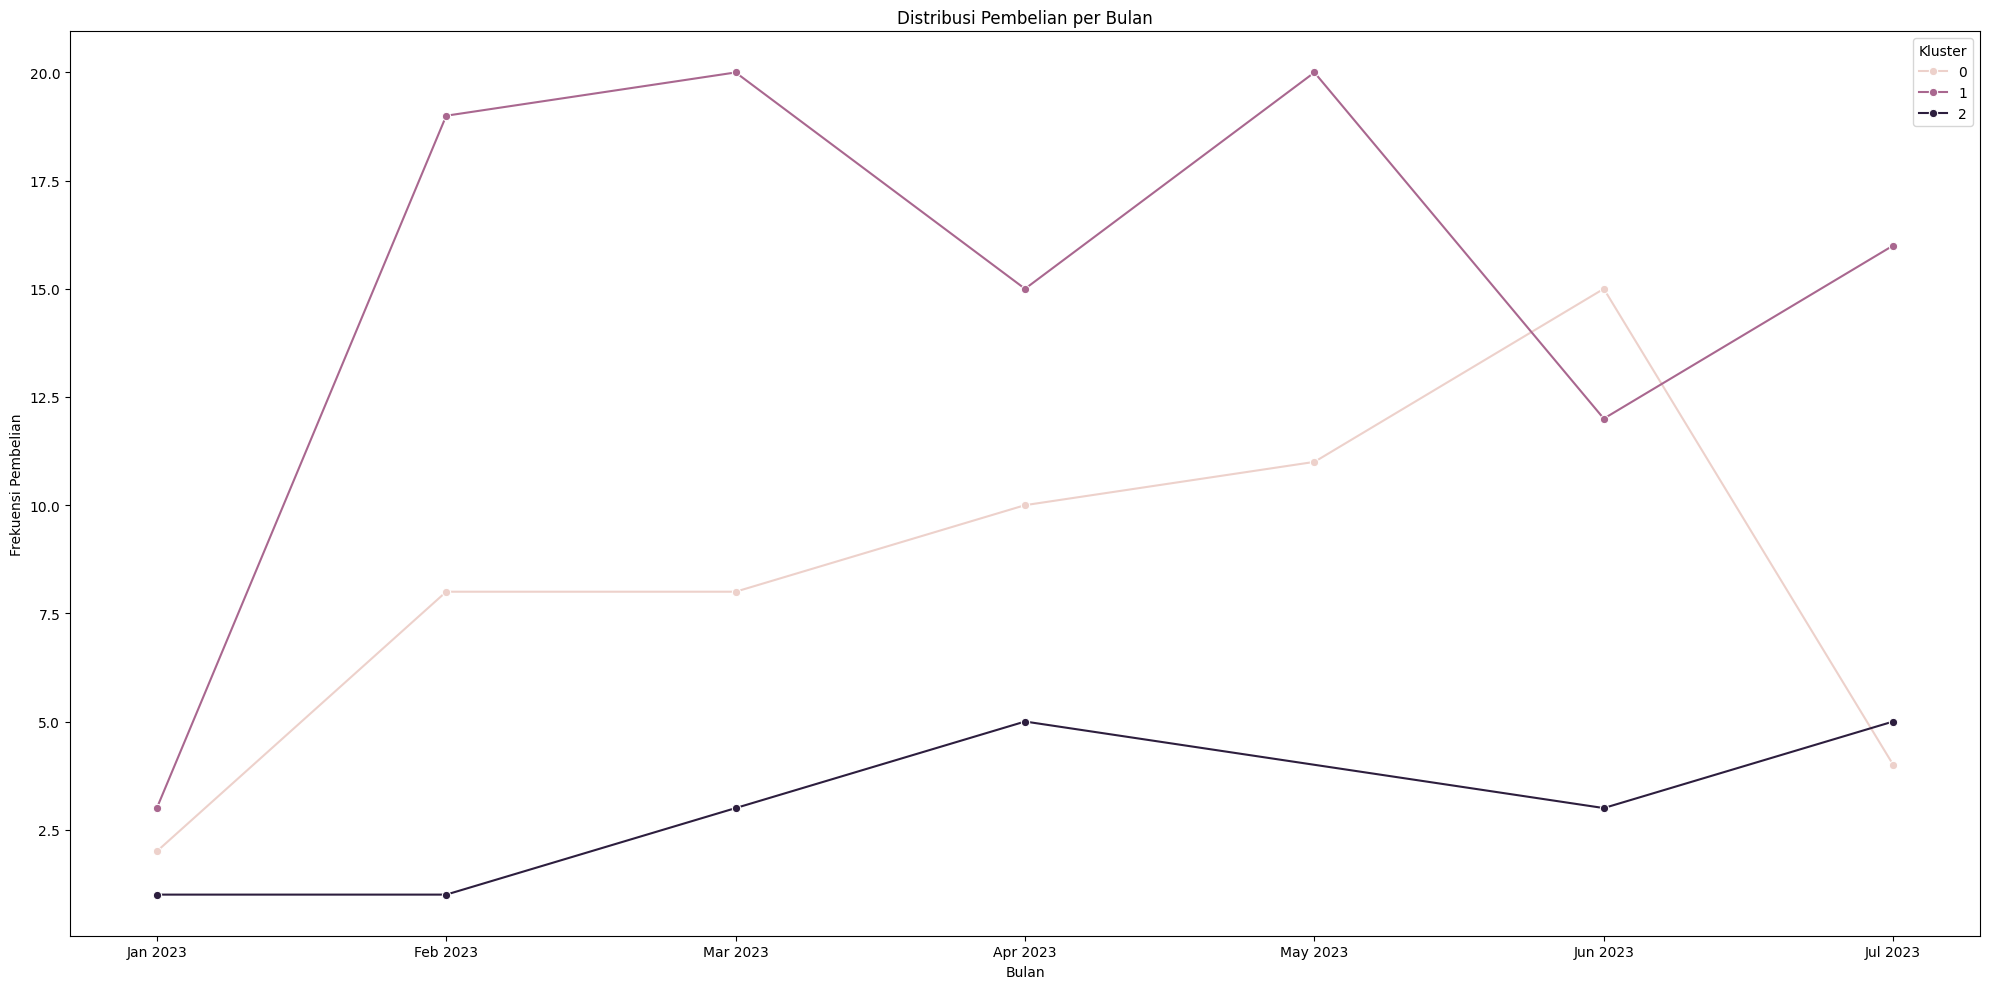

In [ ]:
# Mengatur urutan bulan
bulan_order = ['Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023']

# Mengonversi kolom bulan menjadi tipe data kategori dengan urutan yang diinginkan
frekuensi_model_terurut['Bulan'] = pd.Categorical(frekuensi_model_terurut['Bulan'], categories=bulan_order, ordered=True)

# Mengurutkan DataFrame berdasarkan kluster dan bulan
frekuensi_model_terurut = frekuensi_model_terurut.sort_values(by=['cluster_kmeans', 'Bulan'])

# Plotting
plt.figure(figsize=(20, 10))
sns.lineplot(data=frekuensi_model_terurut, x='Bulan', y='frekuensi', hue='cluster_kmeans', marker='o')
plt.title('Distribusi Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Pembelian')
plt.legend(title='Kluster')
plt.tight_layout()
plt.show()


Kode di atas digunakan untuk membuat visualisasi distribusi frekuensi pembelian per bulan untuk setiap klaster yang dihasilkan dari pengelompokan data menggunakan algoritma KMeans. Pertama, urutan bulan yang diinginkan ditentukan dalam variabel `bulan_order`, lalu kolom bulan diubah menjadi tipe data kategori dengan urutan yang telah ditentukan. DataFrame kemudian diurutkan berdasarkan klaster dan bulan. Setelah itu, plot garis digunakan untuk menampilkan distribusi frekuensi pembelian per bulan untuk setiap klaster. Titel, label sumbu, dan legenda juga ditambahkan untuk memberikan informasi tambahan pada visualisasi.


**Penjelasan Tiap Cluster :**

Grafik ini menunjukkan tren frekuensi pembelian per bulan untuk tiga kelompok pelanggan yang berbeda dari Januari 2023 hingga Juli 2023. Setiap kelompok pelanggan dilambangkan dengan warna berbeda—hitam untuk kluster 3, merah muda untuk kluster 2, dan ungu untuk kluster 1. Kluster 3 (hitam) menunjukkan peningkatan yang stabil dari Januari hingga April dan penurunan kecil di bulan-bulan berikutnya. Kluster 2 (merah muda) memperlihatkan pertumbuhan yang signifikan dari Januari hingga Maret, diikuti oleh fluktuasi naik turun selanjutnya. Sementara itu, kluster 1 (ungu) mencapai puncak di bulan April sebelum menunjukkan penurunan tajam pada Mei dan Juni, diikuti oleh sedikit kenaikan pada Juli.  Grafik ini berguna untuk memahami perilaku pembelian dari masing-masing kluster pelanggan sepanjang waktu, yang dapat membantu bisnis dalam merencanakan strategi pemasaran dan penjualan yang lebih efektif berdasarkan musim atau tren pembelian.

In [ ]:
cluster_Bulan = pd.crosstab(df_clean['cluster_kmeans'], df_clean['Bulan'])

Kode tersebut digunakan untuk membuat tabel silang (crosstab) yang menampilkan distribusi frekuensi pengelompokan data berdasarkan klaster KMeans dan bulan pada dataframe yang telah dibersihkan.

In [ ]:
display(cluster_Bulan)
# Hasil urut sesuai abjad

Bulan,Apr 2023,Feb 2023,Jan 2023,Jul 2023,Jun 2023,Mar 2023,May 2023
cluster_kmeans,,,,,,,
0,10,8,2,4,15,8,11
1,15,19,3,16,12,20,20
2,5,1,1,5,3,3,0


Kode tersebut digunakan untuk menampilkan tabel silang (crosstab) yang telah dibuat sebelumnya, yang menunjukkan distribusi frekuensi pengelompokan data berdasarkan klaster KMeans dan bulan.

**Keterangan**:

In [ ]:
for k in sorted(df_clean['cluster_kmeans'].unique()):
    cluster_stats = df_clean[df_clean['cluster_kmeans'] == k]['Bulan'].describe().to_frame()
    cluster_stats.columns = [f"Statistik Kluster {k}"]
    display(cluster_stats)

,Statistik Kluster 0
count,58
unique,7
top,Jun 2023
freq,15


,Statistik Kluster 1
count,105
unique,7
top,Mar 2023
freq,20


,Statistik Kluster 2
count,18
unique,6
top,Apr 2023
freq,5


Kode tersebut digunakan untuk menghasilkan statistik deskriptif yang terkait dengan bulan-bulan dalam setiap klaster KMeans, dengan menyajikan informasi seperti jumlah entri, rata-rata, simpangan baku, nilai minimum, kuartil, dan nilai maksimum dalam bentuk tabel untuk setiap klaster.

## **Hirarchical kluster**

In [ ]:
frekuensi_model = df_clean.groupby(['Bulan', 'cluster_hierarchical']).size().reset_index(name='frekuensi')

Kode tersebut digunakan untuk menghitung frekuensi masing-masing klaster hasil dari pengelompokan data menggunakan algoritma AgglomerativeClustering, yang telah dilakukan berdasarkan bulan pada dataframe yang telah dibersihkan.

In [ ]:
frekuensi_model_terurut = frekuensi_model.sort_values(by='frekuensi', ascending=False)

Kode tersebut digunakan untuk menyortir dataframe `frekuensi_model` berdasarkan kolom 'frekuensi' secara menurun, sehingga klaster dengan frekuensi yang lebih tinggi muncul terlebih dahulu.

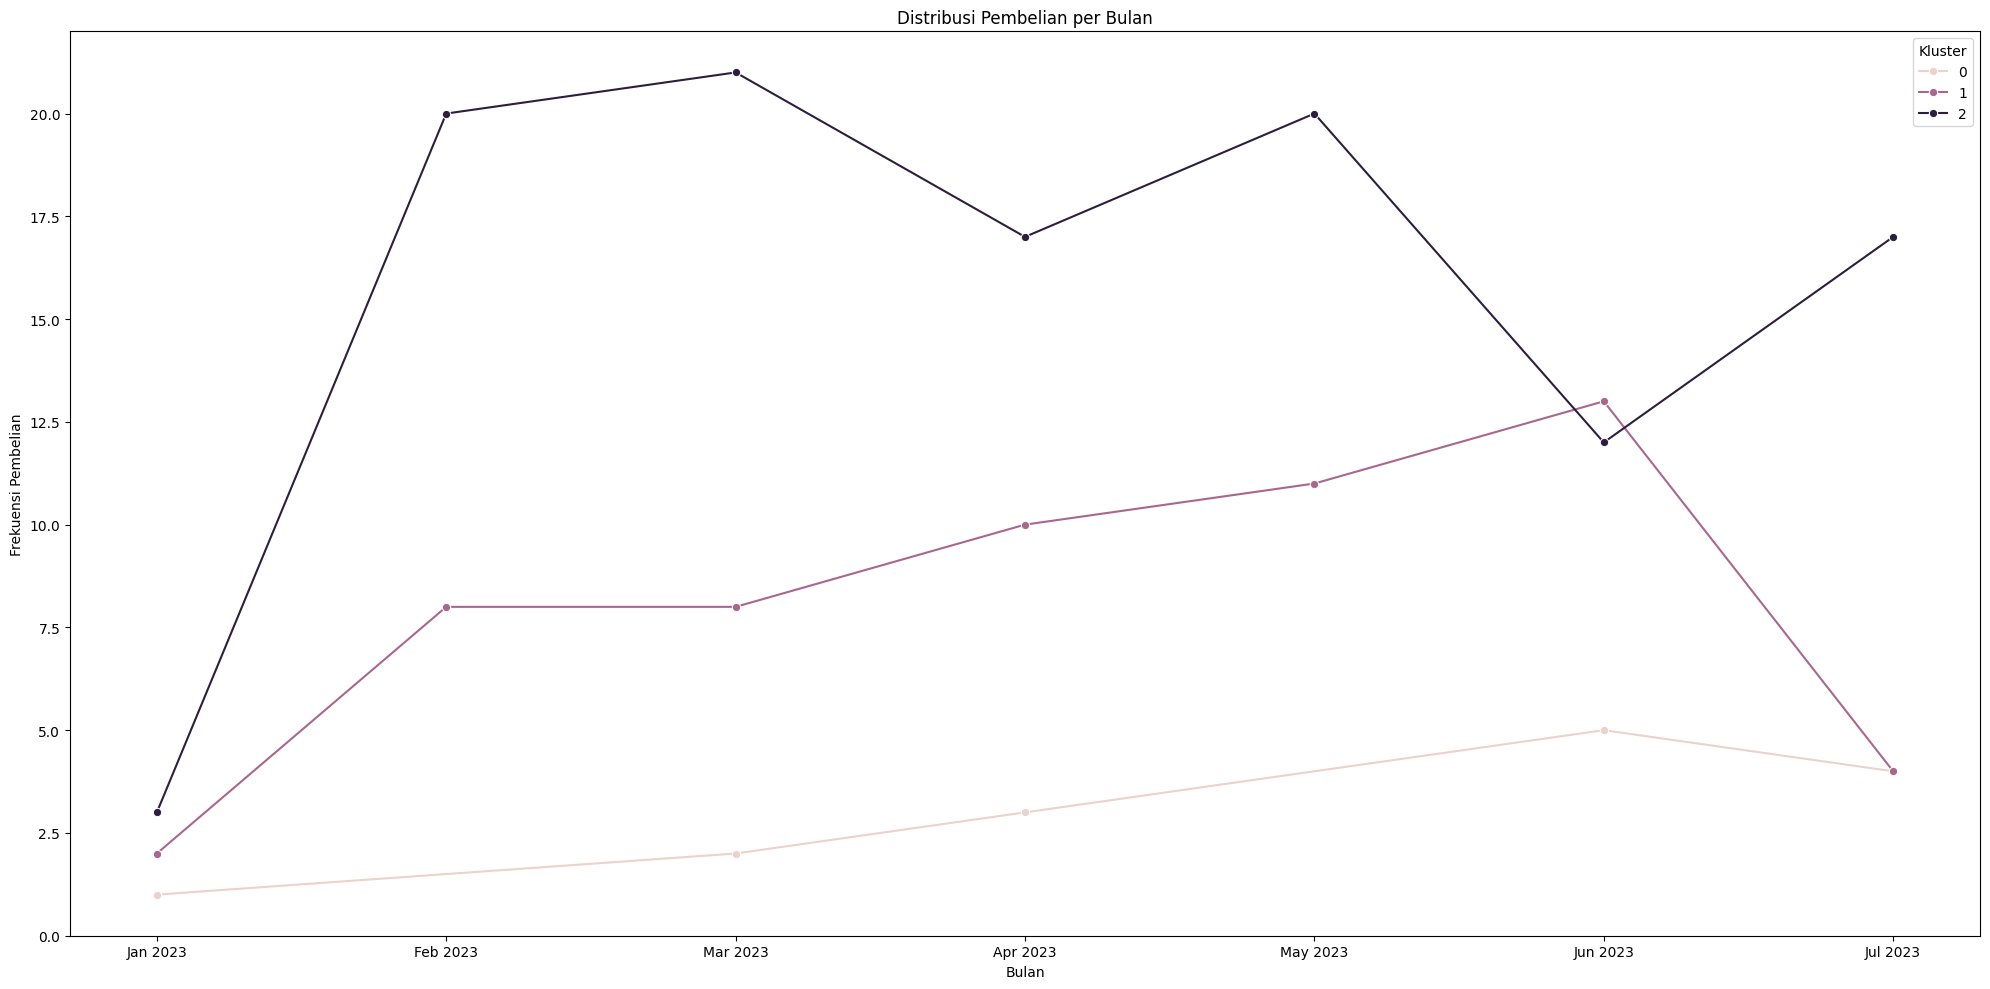

In [ ]:
# Mengatur urutan bulan
bulan_order = ['Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023']

# Mengonversi kolom bulan menjadi tipe data kategori dengan urutan yang diinginkan
frekuensi_model_terurut['Bulan'] = pd.Categorical(frekuensi_model_terurut['Bulan'], categories=bulan_order, ordered=True)

# Mengurutkan DataFrame berdasarkan kluster dan bulan
frekuensi_model_terurut = frekuensi_model_terurut.sort_values(by=['cluster_hierarchical', 'Bulan'])

# Plotting
plt.figure(figsize=(20, 10))
sns.lineplot(data=frekuensi_model_terurut, x='Bulan', y='frekuensi', hue='cluster_hierarchical', marker='o')
plt.title('Distribusi Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Pembelian')
plt.legend(title='Kluster')
plt.tight_layout()
plt.show()

Grafik ini menampilkan distribusi pembelian per bulan dari Januari 2023 hingga Juli 2023 untuk tiga kluster pelanggan yang berbeda, diwakili oleh garis dengan warna hitam, ungu, dan merah muda. Kluster hitam menunjukkan peningkatan tajam dari Januari ke Februari dan mencapai puncaknya di bulan April, kemudian mengalami penurunan dan naik lagi di bulan Juni. Kluster ungu mengalami pertumbuhan yang konsisten dari Januari, mencapai puncak di bulan Juni sebelum mengalami penurunan drastis di bulan Juli. Sementara itu, kluster merah muda, yang memiliki frekuensi pembelian yang relatif rendah di awal tahun, mengalami pertumbuhan yang stabil dan mencapai puncaknya di bulan Mei. Tren ini memberikan gambaran tentang bagaimana perilaku pembelian bervariasi di antara berbagai segmen pelanggan, memberikan wawasan yang berharga untuk strategi pemasaran dan manajemen inventori yang disesuaikan dengan musim dan preferensi pelanggan.

In [ ]:
cluster_Bulanhc = pd.crosstab(df_clean['cluster_hierarchical'], df_clean['Bulan'])

Kode tersebut digunakan untuk membuat tabel silang (crosstab) yang menampilkan distribusi frekuensi pengelompokan data berdasarkan klaster hasil dari algoritma AgglomerativeClustering dan bulan pada dataframe yang telah dibersihkan.

In [ ]:
display(cluster_Bulanhc)
# Hasil urut sesuai abjad

Bulan,Apr 2023,Feb 2023,Jan 2023,Jul 2023,Jun 2023,Mar 2023,May 2023
cluster_hierarchical,,,,,,,
0,3,0,1,4,5,2,0
1,10,8,2,4,13,8,11
2,17,20,3,17,12,21,20


Kode tersebut digunakan untuk menampilkan tabel silang (crosstab) yang telah dibuat sebelumnya, yang menunjukkan distribusi frekuensi pengelompokan data berdasarkan klaster hasil dari algoritma AgglomerativeClustering dan bulan.

In [ ]:
for k in sorted(df_clean['cluster_hierarchical'].unique()):
    cluster_stats = df_clean[df_clean['cluster_hierarchical'] == k]['Bulan'].describe().to_frame()
    cluster_stats.columns = [f"Statistik Kluster {k}"]
    display(cluster_stats)

,Statistik Kluster 0
count,15
unique,5
top,Jun 2023
freq,5


,Statistik Kluster 1
count,56
unique,7
top,Jun 2023
freq,13


,Statistik Kluster 2
count,110
unique,7
top,Mar 2023
freq,21


Kode tersebut digunakan untuk menghasilkan statistik deskriptif yang terkait dengan bulan-bulan dalam setiap klaster hasil dari algoritma AgglomerativeClustering. Dalam setiap iterasi, statistik deskriptif seperti jumlah entri, rata-rata, simpangan baku, nilai minimum, kuartil, dan nilai maksimum dihitung untuk bulan-bulan yang termasuk dalam klaster yang sedang diproses, dan informasi ini ditampilkan dalam bentuk tabel untuk setiap klaster.

In [ ]:
df_clean.to_csv('Data Modeling.csv')

In [ ]:
df_clean

,Beli Langsung Siang,Beli Langsung Malam,Total Beli Langsung,Total Beli Antar,Merek AQUA,Merek DC,Total Penjualan,Total Pengeluaran,Hasil Pendapatan,Bulan,Kategori Penjualan,Kategori Pendapatan,cluster_kmeans,cluster_hierarchical
0,72,58,130,298,228,200,2399000,1090000,1309000,Jan 2023,2,1,2,0
1,30,18,48,331,250,129,2976000,80000,2896000,Jan 2023,2,2,1,2
2,20,19,39,220,139,120,1525000,451000,1074000,Jan 2023,1,1,0,1
3,21,20,41,278,170,149,2098000,450000,1648000,Jan 2023,2,1,1,2
4,28,32,60,160,125,95,1357000,69000,1288000,Jan 2023,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,30,36,66,287,176,177,2220000,1347000,873000,Jul 2023,2,0,1,2
177,24,33,57,294,175,176,2122000,251000,1871000,Jul 2023,2,1,1,2
178,33,30,63,239,151,151,2229000,173500,2055500,Jul 2023,2,2,1,2
179,27,48,75,214,144,145,1963000,390000,1573000,Jul 2023,1,1,0,1


# **EVALUATION**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

Kode tersebut mengimpor pustaka-pustaka dan modul-modul yang diperlukan dari scikit-learn untuk melakukan evaluasi klastering, menerapkan algoritma klastering KMeans dan AgglomerativeClustering, serta melakukan penskalaan fitur dengan StandardScaler dan proses resampling pada data.

In [ ]:
kmeans_labels = pipeline_kmeans.named_steps['kmeans'].labels_

Kode tersebut digunakan untuk mengakses label klaster yang dihasilkan oleh algoritma KMeans yang telah dilatih sebelumnya melalui pipeline.

In [ ]:
hc_labels = pipeline_hc.fit_predict(X_scaled)

Kode tersebut digunakan untuk melakukan prediksi klaster pada data yang telah disesuaikan dan diskalakan menggunakan algoritma AgglomerativeClustering melalui pipeline, serta menetapkan label klaster ke variabel `hc_labels`.

In [ ]:
silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_score_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_score_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

Kode tersebut digunakan untuk menghitung skor evaluasi klastering, seperti rata-rata silhouette, skor Calinski-Harabasz, dan skor Davies-Bouldin, berdasarkan label klaster yang dihasilkan oleh algoritma KMeans pada data yang telah disesuaikan dan diskalakan.

In [ ]:
silhouette_avg_hc = silhouette_score(X_scaled, hc_labels)
ch_score_hc = calinski_harabasz_score(X_scaled, hc_labels)
db_score_hc = davies_bouldin_score(X_scaled, hc_labels)

Kode tersebut digunakan untuk menghitung skor evaluasi klastering, seperti rata-rata silhouette, skor Calinski-Harabasz, dan skor Davies-Bouldin, berdasarkan label klaster yang dihasilkan oleh algoritma AgglomerativeClustering pada data yang telah disesuaikan dan diskalakan.

In [ ]:
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

Kode tersebut digunakan untuk menyimpan nilai skor evaluasi klastering, seperti rata-rata silhouette, skor Calinski-Harabasz, dan skor Davies-Bouldin, baik untuk algoritma KMeans maupun AgglomerativeClustering, dalam list yang sesuai dengan metrik-metrik tersebut.

In [ ]:
df_scores = pd.DataFrame({
    'Metrics': metrics,
    'KMeans Score': scores_kmeans,
    'Hierarchical Clustering Score': scores_hc
})

Kode tersebut digunakan untuk membuat dataframe `df_scores` yang berisi nilai-nilai skor evaluasi klastering untuk metrik-metrik tertentu, baik untuk algoritma KMeans maupun AgglomerativeClustering.

In [ ]:
df_scores = df_scores.set_index('Metrics').T
display(df_scores)

Metrics,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.305223,57.134236,1.335438
Hierarchical Clustering Score,0.299761,52.318264,1.355457


Kode tersebut digunakan untuk mentranspose dataframe `df_scores` dan mengatur metrik-metrik sebagai indeks baris, sehingga nilai skor evaluasi klastering untuk algoritma KMeans dan AgglomerativeClustering menjadi lebih mudah dibaca dan dibandingkan.

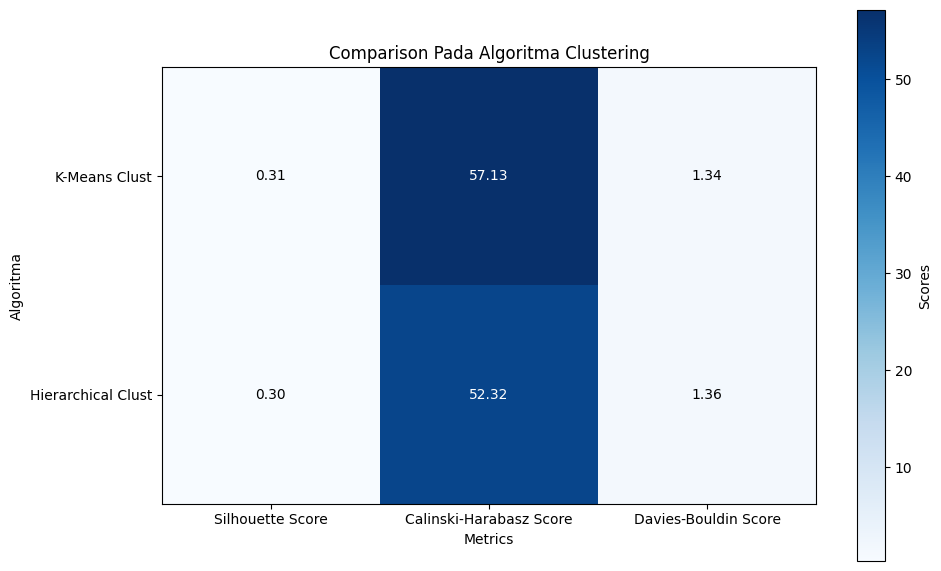

In [ ]:
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [0.305223, 57.134236, 1.335438]
scores_hc = [0.299761, 52.318264, 1.355457]
evaluation_matrix = np.array([scores_kmeans])

evaluation_matrix = np.array([scores_kmeans, scores_hc])

plt.figure(figsize=(10, 6))
plt.imshow(evaluation_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Comparison Pada Algoritma Clustering')
plt.colorbar(label='Scores')
plt.xticks(np.arange(len(metrics)), metrics)
plt.yticks(np.arange(evaluation_matrix.shape[0]), ['K-Means Clust', 'Hierarchical Clust'])

for i in range(evaluation_matrix.shape[0]):
    for j in range(len(metrics)):
        plt.text(j, i, f"{evaluation_matrix[i, j]:.2f}",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if evaluation_matrix[i, j] > np.max(evaluation_matrix) / 2 else "black")
plt.ylabel('Algoritma')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

Grafik ini membandingkan efektivitas dua algoritma klustering, yaitu K-Means Clustering dan Hierarchical Clustering, menggunakan tiga metrik evaluasi yang berbeda: Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score. Silhouette Score mengukur seberapa baik objek dikelompokkan dengan kluster yang tepat, dengan skor lebih tinggi menunjukkan pemisahan kluster yang lebih baik. K-Means memiliki skor Silhouette yang sedikit lebih tinggi (0.31) dibandingkan dengan Hierarchical (0.30), menunjukkan pemisahan kluster yang sedikit lebih efektif. Calinski-Harabasz Score mengukur rasio dispersi antar-kluster dan intra-kluster, dengan skor lebih tinggi menunjukkan kluster yang lebih terdefinisi dengan baik; di sini, K-Means (57.13) juga unggul atas Hierarchical (52.32). Davies-Bouldin Score mengukur seberapa efektif kluster terpisah dan dikompakkan, dengan skor lebih rendah menunjukkan kinerja yang lebih baik; kedua metode memiliki skor yang sangat berdekatan, dengan K-Means sedikit lebih baik (1.34) dibanding Hierarchical (1.36). Secara keseluruhan, K-Means Clustering menunjukkan kinerja yang lebih baik dalam ketiga metrik ini dibandingkan dengan Hierarchical Clustering.

## **Review Process**

### **Cross Validation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

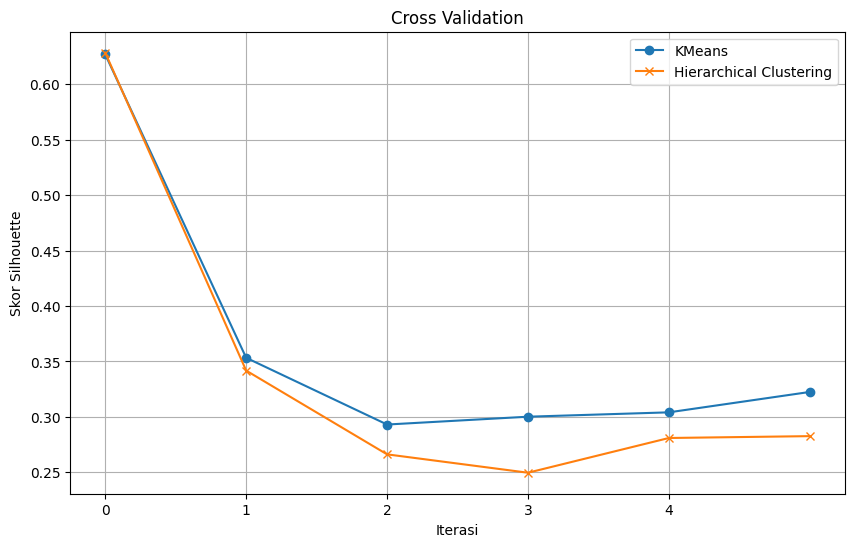

In [ ]:
iterasi = 5
skor_silhouette_kmeans = [0.627017]
skor_silhouette_hc = [0.628556]

data = np.random.rand(100, 3)

for i in range(iterasi):
  data_sample = resample(data, random_state=i)
  scaler = StandardScaler()
  data_sample_scaled = scaler.fit_transform(data_sample)

  kmeans = KMeans(n_clusters=3, random_state=42)
  kmeans.fit(data_sample_scaled)
  skor_silhouette_kmeans.append(silhouette_score(data_sample_scaled, kmeans.labels_))

  hc = AgglomerativeClustering(n_clusters=3)
  cluster_labels_hc = hc.fit_predict(data_sample_scaled)
  skor_silhouette_hc.append(silhouette_score(data_sample_scaled, cluster_labels_hc))

plt.figure(figsize=(10, 6))
plt.plot(skor_silhouette_kmeans, marker='o', label='KMeans')
plt.plot(skor_silhouette_hc, marker='x', label='Hierarchical Clustering')
plt.title('Cross Validation')
plt.xlabel('Iterasi')
plt.ylabel('Skor Silhouette')
plt.legend()
plt.grid(True)
plt.xticks(range(iterasi))
plt.show()

**Keterangan**:  Gambar tersebut menampilkan grafik garis yang berjudul "Cross Validation" dengan dua garis yang mewakili algoritma clustering yang berbeda: KMeans dan Hierarchical Clustering. Sumbu x dilabeli "Iterasi" dengan nilai berkisar dari 0 hingga 4. Sumbu y dilabeli "Skor Silhouette," yang merupakan metrik yang digunakan untuk mengukur kualitas clustering, dengan nilai berkisar sekitar 0.25 hingga 0.65.

Grafik ini mengilustrasikan hasil validasi silang dari dua algoritma klustering, K-Means dan Hierarchical Clustering, diukur dengan Skor Silhouette selama lima iterasi. Skor Silhouette digunakan untuk menilai seberapa baik data telah diklusterkan, dengan skor yang lebih tinggi menunjukkan pemisahan yang lebih baik antara kluster. Dalam iterasi pertama, kedua algoritma memulai dengan skor yang tinggi, menunjukkan pemisahan kluster yang baik, tetapi terjadi penurunan tajam pada iterasi kedua. K-Means menunjukkan penurunan yang lebih stabil dan kurang drastis dibandingkan Hierarchical Clustering, yang mengalami penurunan lebih dalam pada iterasi kedua dan ketiga sebelum sedikit membaik di iterasi keempat. K-Means tampak lebih stabil dan konsisten dalam mempertahankan skor yang lebih tinggi sepanjang iterasi, sedangkan Hierarchical Clustering menunjukkan variasi yang lebih besar dalam performanya.

### **Tunning Hyperparameter**

In [ ]:
X = X_scaled

param_grid = {
    'n_clusters': [2, 3, 4],
    'init_method': ['k-means++', 'random'],
    'algo_type': ['lloyd', 'elkan']
}

best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init_method in param_grid['init_method']:
        for algo_type in param_grid['algo_type']:
            kmeans = KMeans(n_clusters=n_clusters, init=init_method, algorithm=algo_type, n_init=10, random_state=42)
            labels = kmeans.fit_predict(X)
            silhouette_avg = silhouette_score(X, labels)
            print("Skor Silhouette:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init_method =", init_method, ", algo_type =", algo_type)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init_method': init_method, 'algo_type': algo_type}

print("\nKombinasi terbaik:")
print(best_params)
print("Skor Silhouette terbaik:", best_score)

Skor Silhouette: 0.29218627043633044 dengan n_clusters = 2 , init_method = k-means++ , algo_type = lloyd
Skor Silhouette: 0.29218627043633044 dengan n_clusters = 2 , init_method = k-means++ , algo_type = elkan
Skor Silhouette: 0.29218627043633044 dengan n_clusters = 2 , init_method = random , algo_type = lloyd
Skor Silhouette: 0.29218627043633044 dengan n_clusters = 2 , init_method = random , algo_type = elkan
Skor Silhouette: 0.30522268308692924 dengan n_clusters = 3 , init_method = k-means++ , algo_type = lloyd
Skor Silhouette: 0.30522268308692924 dengan n_clusters = 3 , init_method = k-means++ , algo_type = elkan
Skor Silhouette: 0.30444866969461964 dengan n_clusters = 3 , init_method = random , algo_type = lloyd
Skor Silhouette: 0.30444866969461964 dengan n_clusters = 3 , init_method = random , algo_type = elkan
Skor Silhouette: 0.232214753579355 dengan n_clusters = 4 , init_method = k-means++ , algo_type = lloyd
Skor Silhouette: 0.232214753579355 dengan n_clusters = 4 , init_metho

Kode tersebut digunakan untuk mencari kombinasi parameter terbaik untuk algoritma KMeans berdasarkan kriteria rata-rata silhouette. Dalam setiap iterasi dari loop bersarang, algoritma KMeans dilatih dengan parameter yang berbeda dari `param_grid`, dan kemudian rata-rata silhouette dari klastering yang dihasilkan dievaluasi. Setiap kali sebuah kombinasi parameter memberikan nilai silhouette yang lebih tinggi dari nilai terbaik sebelumnya, nilai terbaik diperbarui bersama dengan parameter yang sesuai. Setelah loop selesai, kombinasi parameter terbaik beserta skor silhouette terbaik dicetak.

In [ ]:
# Pembersihan data
x_final_norm = X_scaled
indeks_nol = np.where(~x_final_norm.any(axis=1))[0]
x_final_norm_filtered = np.delete(x_final_norm, indeks_nol, axis=0)

# Parameter grid
param_grid = {
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average', 'single']
}

n_clusters_optimal = 3
best_score = -1
best_params = {}

# Loop untuk mencari kombinasi terbaik
for metric in param_grid['metric']:
    for linkage in param_grid['linkage']:
        if linkage == 'ward' and metric != 'euclidean':
            continue  # Skip kombinasi yang tidak valid
        hierarch = AgglomerativeClustering(n_clusters=n_clusters_optimal, metric=metric, linkage=linkage)
        label = hierarch.fit_predict(x_final_norm_filtered)
        silhouette_avg = silhouette_score(x_final_norm_filtered, label)
        print("Nilai Silhouette Score:", silhouette_avg, "dengan kombinasi metrik =", metric, ", penghubungan =", linkage)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = {'metric': metric, 'linkage': linkage, 'score': silhouette_avg}

# Menampilkan hasil terbaik
print("\nKombinasi parameter terbaik adalah:", best_params)


Nilai Silhouette Score: 0.2997613789714588 dengan kombinasi metrik = euclidean , penghubungan = ward
Nilai Silhouette Score: 0.5094302569687253 dengan kombinasi metrik = euclidean , penghubungan = complete
Nilai Silhouette Score: 0.5439763840006099 dengan kombinasi metrik = euclidean , penghubungan = average
Nilai Silhouette Score: 0.5439763840006099 dengan kombinasi metrik = euclidean , penghubungan = single
Nilai Silhouette Score: 0.29607444625499857 dengan kombinasi metrik = manhattan , penghubungan = complete
Nilai Silhouette Score: 0.44245016713253 dengan kombinasi metrik = manhattan , penghubungan = average
Nilai Silhouette Score: 0.5439763840006099 dengan kombinasi metrik = manhattan , penghubungan = single
Nilai Silhouette Score: 0.1825694911814742 dengan kombinasi metrik = cosine , penghubungan = complete
Nilai Silhouette Score: 0.25670898407579806 dengan kombinasi metrik = cosine , penghubungan = average
Nilai Silhouette Score: -0.11739894219495611 dengan kombinasi metrik = c

Kode tersebut digunakan untuk mencari kombinasi parameter terbaik untuk algoritma Agglomerative Clustering berdasarkan rata-rata silhouette. Proses dimulai dengan membersihkan data dari baris yang memiliki semua nilai nol, kemudian parameter yang akan diuji disusun dalam `param_grid`. Dalam setiap iterasi dari loop bersarang, model Agglomerative Clustering dilatih dengan parameter yang berbeda, dan kemudian rata-rata silhouette dari klastering yang dihasilkan dievaluasi. Kombinasi parameter yang memberikan rata-rata silhouette tertinggi disimpan sebagai hasil terbaik. Setelah loop selesai, hasil terbaik beserta kombinasi parameternya dicetak.

## **Determine Next Step**

In [ ]:
skor_terbaik = max(silhouette_avg_kmeans, silhouette_avg_hc)
model_terbaik = "Hierarchical" if skor_terbaik == silhouette_avg_hc else "KMeans"

print(f"\nModel terbaik secara keseluruhan adalah {model_terbaik} dengan skor Silhouette {skor_terbaik}")


Model terbaik secara keseluruhan adalah KMeans dengan skor Silhouette 0.30522268308692924


Kode tersebut digunakan untuk membandingkan nilai rata-rata silhouette antara model KMeans dan Hierarchical Clustering, kemudian menentukan model mana yang memiliki skor silhouette tertinggi secara keseluruhan, dan hasilnya dicetak.

## **Kesimpulan**

Berdasarkan hasil analisis yang telah dilakukan, model clustering terbaik untuk data ini adalah model K-Means dengan skor Silhouette sebesar 0.30522268308692924. Skor Silhouette digunakan untuk mengevaluasi seberapa baik setiap titik data cocok dengan klusternya sendiri dibandingkan dengan kluster lain. Rentang skor Silhouette adalah dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan penyesuaian yang lebih baik. Ini menunjukkan bahwa model ini mampu mengkluster data dengan baik, di mana setiap titik data cenderung mirip dengan titik data lain dalam klusternya, dan berbeda dengan titik data di kluster lain.
